In [1]:
import numpy as np, pandas as pd
from pygeocoder import Geocoder
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Do the following for db and db2 location, they are two different samples.

In [2]:
#define database path
path='./db/'

#use if files downloaded to local path
path='./db2/'

In [3]:
repr('î')

"'\\xc3\\xae'"

In [4]:
#define locationrenamer 

def namer(s):
    
    if ',' in s: s=s[:s.find(',')]
    
    s=s.replace('\xc3\xa8','\xc3\xa9')
    s=s.replace('\xc3\xa0','\xc3\xa1')
    s=s.replace('\xc3\xb2','\xc3\xb3')
    s=s.replace('\xc3\xb9','\xc3\xba')
    s=s.replace('Mez\xc3\xb6','Mez\xc5\x91')
    s=s.replace('mez\xc3\xb6','mez\xc5\x91')
    s=s.replace('Erd\xc3\xb6','Erd\xc5\x91')
    s=s.replace('fal\xc3\xba','falu')
    s=s.replace('f\xc3\xbcrd\xc3\xb6','f\xc3\xbcrd\xc3\x91')
    
    if s=='Csikszereda': return 'Csíkszereda'
    elif s=='Miercurea-Ciuc': return 'Csíkszereda'
    elif s=='Miercurea Ciuc': return 'Csíkszereda'
    elif s=='Csikr\xc3\xa1kos': return 'Csíkrákos'
    elif s=='Csikszentimre': return 'Csíkszentimre'
    elif s=='Chilieni': return 'Kilyénfalva'
    elif s=='Tusnad Sat': return 'Tusnád'
    elif s=='Reci': return 'Réty'
    elif s=='Intorsura Buzaului': return 'Bodzaforduló'
    elif s=='Ocna De Sus': return 'Felsősófalva'
    elif s=='Sancraiu De Mures': return 'Marosszentkirály'
    elif s=='Breaza': return 'Beresztelke'
    elif s=='Corund': return 'Korond'
    elif s=='Intorsura Buzaului': return 'Bodzaforduló'
    elif s=='Intorsura Buzauli': return 'Bodzaforduló'
    elif s=='Bicfalau': return 'Bikfalva'
    elif s=='Cernatul-De-Jos': return 'Alsócsernáton'
    elif s=='Ojdula': return 'Ozsdola'
    elif s=='Bretcu': return 'Bereck'
    elif s=='Zabala': return 'Zabola'
    elif s=='Micfalau': return 'Mikóújfalu'
    elif s=='Csikszentkir\xc3\xa0ly': return 'Csíkszentkirály'
    elif s=='Csikszentmikl\xc3\xb3s': return 'Csíkszentmiklós'
    elif s=='Belgrade': return 'Belgrád'
    elif s=='S\xc3\xaendominic': return 'Csíkszentdomokos'
    elif s=='Budapest': return 'Budapest'
    elif s=='Cluj-Napoca': return 'Kolozsvár'
    elif s=='Timi\xc8\x99oara': return 'Temesvár'
    elif s=='Targu-Mures': return 'Marosvásárhely'
    elif s=='Csik Mindszent': return 'Csíkmindszent'
    elif s=='Abu Dhabi': return 'Abu Dhabi'
    elif s=='Tusnad F\xc3\xbcrd\xc3\xb6': return 'Tusnádfürdő'
    elif s=='Vienna': return 'Bécs'
    elif s=='Sepsiszentgyorgy': return 'Sepsiszentgyörgy'
    elif s=='Sf\xc3\xa2ntu-Gheorghe': return 'Sepsiszentgyörgy'
    elif s=='Paris': return 'Párizs'
    elif s=='Nagy-V\xc3\xa1rad': return 'Nagyvárad'
    elif s=='Nitra': return 'Nyitra'
    elif s=='Krak\xc3\xb3w': return 'Krakkó'
    elif s=='Tusnad': return 'Tusnád'
    elif s=='Zetea': return 'Zetelaka'
    elif s=='Siculeni': return 'Madéfalva'
    elif s=='Sz\xc3\xa9pviz': return 'Csíkszépvíz'
    elif s=='Sibiu': return 'Nagyszeben'
    elif s=='Bucharest': return 'Bukarest'
    elif s=='Oradea': return 'Nagyvárad'
    elif s=='Hodmezovasarhely': return 'Hódmezővásárhely'
    elif s=='Brussels': return 'Brüsszel'
    elif s=='Cologne': return 'Köln'
    elif s=='Dealu': return 'Oroszhegy'
    elif s=='Delne': return 'Csíkdelne'
    elif s=='Sz\xc3\xa9kelykeresztur': return 'Székelykeresztúr'
    elif s=='Bulgareni': return 'Bogárfalva'
    elif s=='Sighetu Marmatiei': return 'Máramarossziget'
    elif s=='Odorheiu Secuiesc': return 'Székelyudvarhely'
    elif s=='Athens': return 'Athén'
    elif s=='Brasov': return 'Brassó'
    elif s=='Beta': return 'Béta'
    elif s=='Martinis': return 'Homoródszentmárton'
    elif s=='Copenhagen': return 'Koppenhága'
    elif s=='Buda': return 'Budapest'
    elif s=='Neumarkt Am Mieresch': return 'Marosvásárhely'
    elif s=='Vlahita': return 'Szentegyháza'
    elif s=='Szentegyházasfalu': return 'Szentegyháza'
    elif s=='Fenyokut': return 'Fenyőkút'
    elif s=='Felsoboldogfalva': return 'Felsőboldogfalva'
    elif s=='Baile Tusnad': return 'Tusnádfürdő'
    elif s=='Szegedin': return 'Szeged'
    elif s=='Küküllokeményfalva': return 'Küküllőkeményfalva'
    elif s=='Oraseni': return 'Városfalva'
    elif s=='Nyikomalomfalva': return 'Nyikómalomfalva'
    elif s=='Szatmár-Németi': return 'Szatmárnémeti'
    elif s=='Lövete': return 'Lövéte'
    elif s=='Kézdi Almas': return 'Kézdialmás'
    elif s=='Cristuru Secuiesc': return 'Székelykeresztúr'
    elif s=='Sacueni': return 'Székelyhíd'
    elif s=='Szekelyszentmihaly': return 'Székelyszentmihály'
    elif s=='Debreczen': return 'Debrecen'
    elif s=='Liban': return 'Libán'
    elif s=='Leipzig': return 'Lipcse'
    elif s=='Pasareni': return 'Backamadaras'
    elif s=='Munich': return 'München'
    elif s=='Nuremberg': return 'Nüremberg'
    elif s=='Amsterdam': return 'Amszterdam'
    elif s=='Csik-Kozmas': return 'Csíkkozmás'
    elif s=='Csiktaploca': return 'Csíktaploca'
    elif s=='Csikszentsimon': return 'Csíkszentsimon'
    elif s=='Csikszentmárton': return 'Csíkszentmárton'
    elif s=='Vacaresti': return 'Vacsárcsi'
    elif s=='Milan': return 'Milánó'
    elif s=='Csikszentgyörgy': return 'Csíkszentgyörgy'
    elif s=='Nadejdea': return 'Ajnád'
    elif s=='Csikszenttamás': return 'Csíkszenttamás'
    elif s=='Gyor': return 'Győr'
    elif s=='London Borough of Camden': return 'London'
    elif s=='Csikszentdomokos': return 'Csíkszentdomokos'
    elif s=='Csikszentkirály': return 'Csíkszentkirály'
    elif s=='Madaras': return 'Csíkmadaras'
    elif s=='Karcfalva': return 'Csíkkarcfalva'
    elif s=='Ciceu': return 'Csíkcsicsó'
    elif s=='Izvoare': return 'Ivó'
    elif s=='Gyomro': return 'Gyömrő'
    elif s=='Sf\xc3\xaentu Gheorghe': return 'Sepsiszentgyörgy'
    elif s=='Baraolt': return 'Barót'
    elif s=='K\xc3\xb8benhavn': return 'Koppenhága'
    elif s=='Mik\xc3\xb4ujfal\xc3\xba': return 'Mikóújfalu'
    elif s=='Zagon': return 'Zágon'
    elif s=='Sarmasul': return 'Salamás'
    elif s=='Zalau': return 'Zilah'
    elif s=='Simleu Silvaniei': return 'Sepsiszentgyörgy'
    elif s=='Zalan': return 'Zalán'
    elif s=='Oradea-Mare': return 'Nagyvárad'
    elif s=='Ormenis': return 'Ürmös'
    elif s=='Bicsad': return 'Sepsibükszád'
    elif s=='Ozun': return 'Uzon'
    elif s=='Arkos': return 'Árkos'
    elif s=='Gheorgheni': return 'Gyergyószentmiklós'
    elif s=='S\xc3\xa2npetrul': return 'Barcaszentpéter'
    elif s=='Geneva': return 'Genf'
    elif s=='Breda': return 'Bréda'
    elif s=='Zoltan': return 'Zoltán'
    elif s=='Leliceni': return 'Csíkszentlélek'
    elif s=='Suatu': return 'Magyarszovát'
    elif s=='Pest': return 'Budapest'
    elif s=='Bacau': return 'Bákó'
    elif s=='Varfalau': return 'Várfalva'
    elif s=='Biksz\xc3\xa1d': return 'Sepsibükszád'
    elif s=='Satu Mare': return 'Szatmárnémeti'
    elif s=='Köröspatak': return 'Kőröspatak'
    elif s=='Prague': return 'Prága'
    elif s=='Turin': return 'Torinó'
    elif s=='Poiana Largului': return 'Hosszúmező'
    elif s=='Beius': return 'Belényes'
    elif s=='Csics\xc3\xb3': return 'Csíkcsicsó'
    elif s=='Rome': return 'Róma'
    elif s=='Sovata Bai': return 'Szováta'
    elif s=='veroce': return 'Verőce'
    elif s=='Nagy-Sz\xc3\xa9ben': return 'Nagyszeben'
    elif s=='Iasi': return 'Jászvásár'
    elif s=='Rupea': return 'Kőhalom'
    elif s=='Ludu\xc8\x99': return 'Marosludas'
    elif s=='Paingeni': return 'Póka'
    elif s=='Havadto': return 'Havadtő'
    elif s=='Reghinul': return 'Szászrégen'
    elif s=='S\xc3\xa2ncraiul-De-Mures': return 'Marosszentkirály'
    elif s=='Valureni': return 'Székelykakasd'
    elif s=='Ditro': return 'Gyergyóditró'
    elif s=='Sz\xc3\xa1rhegy': return 'Gyergyószárhegy'
    elif s=='Florence': return 'Firenze'
    elif s=='Bogata': return 'Marosbogát'
    elif s=='Alunis': return 'Magyaró'
    elif s=='Selanik (thessaloniki) Greece': return 'Thessaloniki'
    elif s=='Lunca Bradului': return 'Palotailva'
    elif s=='Ceuasul-De Campie': return 'Mezőcsávás'
    elif s=='Sangeorgiul De Mures': return 'Marosszentgyörgy'
    elif s=='Sighisoara': return 'Segesvár'
    elif s=='Gyergyo': return 'Gyergyószentmiklós'
    elif s=='Ogra': return 'Marosugra'
    elif s=='Ujtusn\xc3\xa1d': return 'Újtusnád'
    elif s=='Miercurea Nirajului': return 'Nyárádszereda'
    elif s=='Floresti': return 'Szászfenes'
    elif s=='Santioana-De-Mures': return 'Csittszentiván'
    elif s=='Maroskeresztur': return 'Maroskeresztúr'
    elif s=='Sangeorgiu-De-Padure': return 'Erdőszentgyörgy'
    elif s=='Cristesti': return 'Maroskeresztúr'
    elif s=='Sangeorg-De Mures': return 'Marosszentgyörgy'
    elif s=='Dej': return 'Dés'
    elif s=='Csikfalva': return 'Csíkfalva'
    elif s=='Marghita': return 'Margitta'
    elif s=='Valea Izvoarelor': return 'Buzásbesenyő'
    elif s=='Corunca': return 'Koronka'
    elif s=='Sovata': return 'Szováta'
    elif s=='Ny\xc3\xa1radremete': return 'Nyárádremete'
    elif s=='Cehu Silvaniei': return 'Szilágycseh'
    elif s=='B\xc3\xa1lav\xc3\xa1s\xc3\xa1r,': return 'Balavásár'
    elif s=='Csomafalva': return 'Gyergyócsomafalva'
    elif s=='Szigetsentmiklos': return 'Szigetszentmiklós'
    elif s=='Mik\xc3\xb4ujfal\xc3\xb9': return 'Mikóújfalu'
    elif s=='Bibarczflava': return 'Bibarcfalva'
    elif s=='Bradut': return 'Fenyéd'
    elif s=='Huedin': return 'Bánffyhunyad'
    elif s=='New Delhi': return 'Újdelhi'
    elif s=='Galanta': return 'Galánta'
    elif s=='Beirut': return 'Bejrút'
    elif s=='Riyadh': return 'Rijád'
    elif s=='Jerusalem': return 'Jeruzsálem'
    elif s=='Godollo': return 'Gödöllő'
    elif s=='Balatonfuzfo': return 'Balatonfűzfő'
    elif s=='Fels\xc3\xb6sofalva': return 'Felsősófalva'
    elif s=='Bodok': return 'Sepsibodok'
    elif s=='Bodoc': return 'Sepsibodok'
    elif s=='Biborteni': return 'Bibarcfalva'
    elif s=='Tarnaveni': return 'Dicsőszentmárton'
    elif s=='Bremen': return 'Bréma'
    elif s=='Targu-Sacuesc': return 'Kézdivásárhely'
    elif s=='Ungheni': return 'Nyárádtő'
    elif s=='Racosu De Jos': return 'Alsórákos'
    elif s=='Mikl\xc3\xb3svar': return 'Miklósvár'
    elif s=='V\xc4\x81sad': return 'Vasad'
    elif s=='Sf\xc3\xa2ntul-Gheorghe': return 'Sepsiszentgyörgy'
    elif s=='Malnas Bai': return 'Málnásfürdő'
    elif s=='Colonia Bod': return 'Botfalusi Cukorgyártelep'
    elif s=='Ujfal\xc3\xba': return 'Újfalu'
    elif s=='Doboseni': return 'Székelyszáldobos'
    elif s=='Batanii Mari': return 'Nagybacon'
    elif s=='Rakos': return 'Felsőrákos'
    elif s=='Gonyu': return 'Gönyű'
    elif s=='Capeni': return 'Köpec'
    elif s=='K\xc3\xb6pecz': return 'Köpec'
    elif s=='Senec': return 'Szenc'
    elif s=='Petrosani': return 'Petrozsény'
    elif s=='Biharia': return 'Bihar'
    elif s=='Racos': return 'Felsőrákos'
    elif s=='Erdofule': return 'Erdőfüle'
    elif s=='Kopec': return 'Köpec'
    elif s=='Sarmasag': return 'Sarmaság'
    elif s=='Aiud': return 'Nagyenyed'
    elif s=='Fels\xc3\xb6r\xc3\xa1kos': return 'Felsőrákos'
    elif s=='Ullo': return 'Üllő'
    elif s=='Alba Iulia': return 'Gyulafehérvár'
    elif s=='Felso Szeli': return 'Csíkszereda'
    elif s=='Kom\xc3\xa1ndo': return 'Kommandó'
    elif s=='Remetea': return 'Gyergyóremete'
    elif s=='S\xc3\xa2nnicolaul-De-Munte': return 'Hegyközszentmiklós'
    elif s=='Tulghes': return 'Gyergyótölgyes'
    elif s=='Marosfo': return 'Marosfő'
    elif s=='Lazarea': return 'Gyergyószárhegy'
    elif s=='Gyimesfels\xc3\xb6lok': return 'Gyimesfelsőlok'
    elif s=='K\xc3\xa1szonaltiz': return 'Kászonaltíz'
    elif s=='Suseni': return 'gyergyóújfalu'
    elif s=='Gyerg\xc3\xb2szentmikl\xc3\xb2s': return 'Gyergyószentmiklós'
    elif s=='Magyaro': return 'Magyaró'
    elif s=='Deva': return 'Déva'
    elif s=='Szatm\xc3\xa1r': return 'Szatmárnémeti'
    elif s=='Lacu Rosu': return 'Gyilkostó'
    elif s=='K\xc3\xb6r\xc3\xb6sszegap\xc3\xa1ti': return 'Kőrősszegapáti'
    elif s=='Ditrau': return 'Gyergyóditró'
    elif s=='Naples': return 'Nápoly'
    elif s=='T\xc3\xaergu Secuiesc': return 'Kézdivásárhely'
    elif s=='Turia': return 'Torja'
    elif s=='K\xc3\xa0szonuifal\xc3\xb9': return 'Kászonújfalu'
    elif s=='Cernat': return 'Csernáton'
    elif s=='Cosnea': return 'Kóstelek'
    elif s=='Mereni': return 'Kézdialmás'
    elif s=='Bretcul': return 'Bereck'
    elif s=='Poian': return 'Kézdiszentkereszt'
    elif s=='Cernatul-De-Sus': return 'Csernáton'
    elif s=='Icafalau': return 'Ikafalva'
    elif s=='Bereczk': return 'Bereck'
    elif s=='Zau De C\xc3\xaempie': return 'Mezőzáh'
    elif s=='Hatuica': return 'Hatolyka'
    elif s=='Sarfalva': return 'Sárfalva'
    elif s=='K\xc3\xa9zdi-Mart\xc3\xb2nos': return 'Kézdimartonos'
    elif s=='Csiksomly\xc3\xb3': return 'Csíksomlyó'
    elif s=='Beijing': return 'Peking'
    elif s=='Vlaha': return 'Magyarfenes'
    elif s=='Baciu': return 'Kisbács'
    elif s=='Reghin': return 'Szászrégen'
    elif s=='Eted': return 'Etéd'
    elif s=='Carei': return 'Nagykároly'
    elif s=='Felsolajos': return 'Felsőlajos'
    elif s=='Paltinis': return 'Kecsed'
    elif s=='Atid': return 'Etéd'
    elif s=='Lopadea Noua': return 'Magyarlapád'
    elif s=='Andreeni': return 'Székelyandrásfalva'
    elif s=='Diosig': return 'Bihardiószeg'
    elif s=='Emod': return 'Emőd'
    elif s=='Cristur': return 'Székelykeresztúr'
    elif s=='Andr\xc3\xa1sfalva': return 'Székelyandrásfalva'
    elif s=='Pilisborosjeno': return 'Pilisborosjenő'
    elif s=='Kiskoros': return 'Kiskőrös'
    elif s=='Als\xc3\xb2b\xc3\xb2ldogfalva': return 'Alsóboldogfalva'
    elif s=='Vetca': return 'Székelyvécke'
    elif s=='Goagiu': return 'Gagy'
    elif s=='Betesti': return 'Betfalva'
    elif s=='Kaposfo': return 'Kaposfő'
    elif s=='Bodogaia': return 'Alsóboldogfalva'
    elif s=='Siklodi Oldal': return 'Siklód'
    elif s=='Koszegszerdahely': return 'Kőszegszerdahely'
    elif s=='Ilieni': return 'Lukailencfalva'
    elif s=='Lunca De Jos': return 'Gyimesközéplok'
    elif s=='Tapioszecso': return 'Tápiószecső'
    elif s=='Ujsz\xc3\xa8kely': return 'Újszékely'
    elif s=='Turda': return 'Torda'
    elif s=='Jiboul': return 'Zsibó'
    elif s=='Agnita': return 'Szentágota'
    elif s=='Cisnadie': return 'Nagydisznód'
    elif s=='Peregu Mare': return 'Németpereg'
    elif s=='Constanta': return 'Konstanca'
    elif s=='Hezeris': return 'Lugosegres'
    elif s=='Tekeropatak': return 'Gyergyótekerőpatak'
    elif s=='Galati': return 'Galac'
    elif s=='Covasna': return 'Kovászna'
    elif s=='Kronstadt': return 'Brassó'
    elif s=='T\xc3\xa2rgu Jiu': return 'Zsilvásárhely'
    elif s=='S\xc3\xa2ndominic': return 'Csíkszentdomokos'
    elif s=='Chisineu Chis': return 'Kőrőskisjenő'
    elif s=='Bistrita': return 'Beszterce'
    elif s=='Izvorul Muresului': return 'Marosfő'
    elif s=='Gilau': return 'Gyalu'
    elif s=='Corois\xc3\xa2nmartin': return 'Kóródszentmárton'
    elif s=='Marculeni': return 'Márkod'
    elif s=='Sarmas': return 'Salamás'
    elif s=='Palanca': return 'Palánka'
    elif s=='Odorheiul Secuiesc': return 'Székelyudvarhely'
    elif s=='Talmacel': return 'Kistalmács'
    elif s=='Adjud': return 'Egyedhalma'
    elif s=='Baia Mare': return 'Nagybánya'
    elif s=='Valea Mica': return 'Pokolpatak'
    elif s=='Ghimes-Faget': return 'Gyimesbükk'
    elif s=='Ruganesti': return 'Rugonfalva'
    elif s=='Toplita-Ciuc': return 'Maroshévíz'
    elif s=='Belin': return 'Bölön'
    elif s=='Gurghiu': return 'Görgényszentimre'
    elif s=='Jenofalva': return 'Csíkjenőfalva'
    elif s=='Comanesti': return 'Kománfalva'
    elif s=='Balan': return 'Balánbánya'
    elif s=='Miercurea Ciuc': return 'Csíkszereda'
    elif s=='T\xc3\xa2rgu Jiu': return 'Zsilvásárhely'
    elif s=='Cristolt': return 'Nagykeresztes'
    elif s=='Toplita': return 'Maroshévíz'
    elif s=='Miercurea-Ciucului': return 'Csíkszereda'
    elif s=='Chiheru De Sus': return 'Felsőköhér'
    elif s=='Borsec': return 'Borszék'
    elif s=='Vasluiul': return 'Vaslui'
    elif s=='Bucuresti-Noi': return 'Bukarest'
    elif s=='Istanbul': return 'Isztambul'
    elif s=='Targu-Neamt': return 'Németvásár'
    elif s=='Uzinele Vlahita': return 'Szentegyháza'
    elif s=='Szasz R\xc3\xa9gen': return 'Szászrégen'
    elif s=='Baile Homorod': return 'Homoródfürdő'
    elif s=='Corfu': return 'Korfu'
    elif s=='Lueta': return 'Lövéte'
    elif s=='Praid': return 'Parajd'
    elif s=='Mindszent': return 'Csíkmindszent'
    elif s=='Homorodfurdo': return 'Homoródfürdő'
    elif s=='Homorod-Bai': return 'Homoródfürdő'
    elif s=='Chibed': return 'Kibéd'
    elif s=='Uzonkaf\xc3\xbcrd\xc3\xb6': return 'Uzonkafürdő'
    elif s=='Borzsova': return 'Csíkborzsova'
    elif s=='Mina Sarmmasag': return 'Sarmaság'
    elif s=='Iernut': return 'Radnót'
    elif s=='Medias': return 'Szászmedgyes'
    elif s=='Bratislava': return 'Pozsony'
    elif s=='C\xc3\xa2mpia Turzi': return 'Aranyosgyéres'
    elif s=='C\xc3\xa2mpia Turzi': return 'Aranyosgyéres'
    elif s=='Mosuni': return 'Székelymoson'
    elif s=='Hunedoara': return 'Vajdahunyad'
    elif s=='Damieni': return 'Deményháza'
    elif s=='Chilieni': return 'Kilyén'
    elif s=='Nadlac': return 'Nagylak'
    elif s=='Sacadat': return 'Szakadát'
    elif s=='Baile Sovata': return 'Szováta'
    elif s=='Csengod': return 'Csengőd'
    elif s=='Copaceni': return 'Koppánd'
    elif s=='Livezeni': return 'Jedd'
    elif s=='Viisoara': return 'Csatófalva'
    elif s=='Voivodeni': return 'Vajdaháza'
    elif s=='Rastolita': return 'Ratosnya'
    elif s=='Serbeni': return 'Soropháza'
    elif s=='S\xc3\xa2npetru-De-C\xc3\xa2mpie': return 'Mezőszentpéter'
    elif s=='Iernuteni': return 'Randótfája'
    elif s=='Hermannstadt': return 'Nagyszeben'
    elif s=='Nadasa': return 'Görgénynádas'
    elif s=='City of Brussels': return 'Brüsszel'
    elif s=='Trei Sate': return 'Hármasfalu'
    elif s=='Mar\xc3\xb3s Vecs': return 'Marosvécs'
    elif s=='Gurghiul': return 'Görgényszentimre'
    elif s=='Petelea': return 'Petele'
    elif s=='Jabenita': return 'Görgénysóakna'
    elif s=='Valenii De Mures': return 'Disznajó'
    elif s=='Orfu': return 'Orfű'
    elif s=='Fitcau': return 'Fickópataka'
    elif s=='Dezmir': return 'Dezmér'
    elif s=='Podu Turcului': return 'Törökpadja'
    elif s=='Goreni': return 'Dedrádszéplak'
    elif s=='Mitresti': return 'Nyárádszentmárton'
    elif s=='Ibanesti': return 'Libánfalva'
    elif s=='Gherla': return 'Szamosújvár'
    elif s=='Solovastrul': return 'Görgényoroszfalu'
    elif s=='Reghinul Sashsisch': return 'Szászrégen'
    elif s=='Brancovenesti': return 'Marosvécs'
    elif s=='Zadareni': return 'Zádorlac'
    elif s=='Reghin-Sat': return 'Szászrégen'
    elif s=='Beica De Jos': return 'Alsóbölkény'
    elif s=='Baita': return 'Laposbánya'
    elif s=='Sacalu De Padure': return 'Magyarerdőszakál'
    elif s=='Ideciu De Sus': return 'Alsóidecs'
    elif s=='Chiheru de Jos': return 'Alsóköhér'
    elif s=='Beica De Sus': return 'Felsőbölkény'
    elif s=='Ideciul-De-Jos': return 'Alsóidecs'
    elif s==' Tapioszecso': return 'Tápiószecső'
    elif s=='Glajarie': return 'Görgényüvegcsűr'
    elif s=='Blaj': return 'Balázsfalva'
    elif s=='G\xc3\xb6rg\xc3\xa9ny\xc3\xbcvegcs\xc3\xbcr': return 'Görgényüvegcsűr'
    elif s=='Martinesti': return 'Pusztaszentmárton'
    elif s=='Luna De Sus': return 'Szászlóna'
    elif s=='Chesau': return 'Mezőkeszü'
    elif s=='baile Felix': return 'Félixfürdő'
    elif s=='Dubai': return 'Dubaj'
    elif s=='Nimigea De Jos': return 'Magyarnemegye'
    elif s=='C\xc3\xa2mpia Turzii': return 'Aranyosgyéres'
    elif s=='Craciunelul-De-Jos': return 'Alsókarácsonfalva'
    elif s=='Valenii': return 'Disznajó'
    elif s=='Laslea': return 'Szászszentlászló'
    elif s=='Petrilaca': return 'Oláhpéterlaka'
    elif s=='Nazna': return 'Náznánfalva'
    elif s=='Dragomiresti': return 'Dragomérfalva'
    elif s=='Balauseri': return 'Balavásár'
    elif s=='Saschiz': return 'Szászkézd'
    elif s=='S\xc3\xa2ntioana': return 'Marosszentanna'
    elif s=='Mica': return 'Mikefalva'
    elif s=='Seleusu-Mare': return 'Nagyszőlős'
    elif s=='Odrihei': return 'Vámosudvarhely'
    elif s=='Danes': return 'Dános'
    elif s=='Suplac': return 'Széplak'
    elif s=='Resita': return 'Resicabánya'
    elif s=='Codlea': return 'Feketehalom'
    elif s=='Tigmandru': return 'Cikmántor'
    elif s=='Remetea Lunca': return 'Hosszúremete'
    elif s=='Soardu': return 'Küküllősárd'
    elif s=='Szentharomsag': return 'Szentháromság'
    elif s=='Corbu': return 'Gyergyóholló'
    elif s=='St\xc3\xaenceni': return 'Gödemesterháza'
    elif s=='St\xc3\xa2nceni': return 'Gödemesterháza'
    elif s=='Vertesszolos': return 'Vértesszőlős'
    elif s=='Gheorghieni': return 'Gyergyószentmiklós'
    elif s=='Deda': return 'Déda'
    elif s=='Deda Bistra': return 'Dédabisztra'
    elif s=='Bistra Muresului': return 'Dédabisztra'
    elif s=='Lugoj': return 'Lugos'
    elif s=='Sausa': return 'Székelysóspatak'
    elif s=='Hodosa-De-Ciuc': return 'Csíkhodos'
    elif s=='Subcetate': return 'Zeteváralja'
    elif s=='Pantelimon': return 'Bukarest'
    elif s=='Capilnita': return 'Kápolnásfalu'
    elif s=='Santana-De-Mures': return 'Marosszentanna'
    elif s=='Bocsa': return 'Boksánbánya'
    elif s=='S\xc3\xa2nnicolau Mare': return 'Nagyszentmiklós'
    elif s=='S\xc3\xa2nnicolaul Mare': return 'Nagyszentmiklós'
    elif s=='S\xc3\xa2npetru Mic': return 'Kisszentpéter'
    elif s=='S\xc3\xaennicolaul Mare': return 'Nagyszentmiklós'
    elif s=='St\xc3\xa2nceni': return 'Gödemesterháza'
    elif s=='Ciobotani': return 'Csobotány'
    elif s=='Lunca De Sus': return 'Gyimesfelsőlok'
    elif s=='Ghindari': return 'Makkfalva'
    elif s=='Caporal Alexa': return 'Erdőskerek'
    elif s=='Coldau': return 'Várkudu'
    elif s=='Bicaz Chei': return 'Békás'
    elif s=='Bilbor': return 'Bélbor'
    elif s=='Moscow': return 'Moszkva'
    
    else: return s

In [5]:
def code(i):
    i=i.replace('Sonderjylland','')
    if i=='Szentegyházasfalu': tocode='Valhita, Harghita, Romania'
    elif i=='Szentegyh\xc3\xa1zasfalu': tocode='Valhita, Harghita, Romania'
    elif i=='Sarmasul, Mures, Romania': tocode='Sarmas, Mures, Romania'
    elif i=='Ilencfalva, Mures, Romania': tocode='Ilieni, Mures, Romania'
    elif i=='Reghinul, Mures, Romania': tocode='Reghin, Mures, Romania'
    elif i=='S\xc3\xa2ncraiul-De-Mures, Mures, Romania': tocode='Sancraiu de Mures, Mures, Romania'
    elif i=='Monoritoko, Mahajanga, Madagascar': tocode='Manaritoka, Mahajanga, Madagascar'
    elif i=='Sangeorg-De Mures, Mures, Romania': tocode='Sangeorgiu De Mures, Mures, Romania'
    elif i=='S\xc3\xb6lden, Austria': tocode='Solden, Austria'
    elif i=='Pjelax, L\xc3\xa4nsi-Suomen L\xc3\xa4\xc3\xa4ni, Finland': tocode='Pjelax, Finland'
    elif i=='Siklodi Oldal, Mures, Romania': tocode='Siklod, Mures, Romania'
    elif i=='Kereszt\xc3\xbar, Timis, Romania': tocode='Cherestur, Timis, Romania'
    elif i=='Jiboul, Salaj, Romania': tocode='Jibou, Salaj, Romania'
    elif i=='Szasz R\xc3\xa9gen, Mures, Romania': tocode='Reghin, Mures, Romania'
    elif i=='Fick\xc3\xb3, Mures, Romania': tocode='Fitcau, Mures, Romania'
    elif i=='Gurghiul, Mures, Romania': tocode='Gurghiu, Mures, Romania'
    elif i=='Mar\xc3\xb3s Vecs, Mures, Romania': tocode='Brancovenesti, Mures, Romania'
    elif i=='Felfalu, Mures, Romania': tocode='Suseni, Mures, Romania'
    elif i=='Solovastrul, Mures, Romania': tocode='Solovastru, Mures, Romania'
    elif i=='Reghinul Sashsisch, Mures, Romania': tocode='Reghin, Mures, Romania'
    elif i=='Ideciul-De-Jos, Mures, Romania': tocode='Ideciu De Jos, Mures, Romania'
    elif i=='Craciunelul-De-Jos, Alba, Romania': tocode='Craciunelu De Jos, Alba, Romania'
    elif i=='Seleusu-Mare, Mures, Romania': tocode='Seleus, Mures, Romania'
    elif i=='Chendu Mare, Mures, Romania': tocode='Chend, Mures, Romania'
    elif i=='Chendu Mare, Mures, Romania': tocode='Chend, Mures, Romania'
    elif i=='Galautasi, Mures, Romania': tocode='Galautasi, Romania'
    elif i=='Iermata Neagra, Timis, Romania': tocode='Iermata Neagra, Romania'
    elif i=='Kiskend, Mures, Romania': tocode='Chendu, Mures, Romania'
    elif i=='Teremeujfal\xc3\xb9, Mures, Romania': tocode='Satu Nou, Mures, Romania'
    elif i=='Eremitul, Mures, Romania': tocode='Eremitu, Mures, Romania'
    elif i=='Szentbenedek, Mures, Romania': tocode='Manastirea, Cluj, Romania'
    elif i=='Baczkamadaras, Mures, Romania': tocode='Pasareni, Mures, Romania'
    elif i=='Arpasel, Timis, Romania': tocode='Arpasel, Bihor, Romania'
    elif i=='Grintiesu Mic, Neamt, Romania': tocode='Grinties, Neamt, Romania'
    elif i=='Batos': tocode='Batos, Mures, Romania'
    elif i=='Batos': tocode='Paks, Hungary'
    elif i=='Toplita-Ciuc, Harghita, Romania': tocode='Toplita, Harghita, Romania'
    elif i=='Kopec': tocode='Capeni, Harghita, Romania'
    elif i=='S\\xc3\\xa2nger': tocode='Sanger, Mures, Romania'
    else: tocode=i
    return tocode

In [6]:
path="db2/"

In [7]:
#global placelist
GL={}
#load existing, if exits
VL=json.loads(file("VL.json").read())

In [8]:
varosok=[
'csikszereda',
'udvarhely',
'szentgyorgy',
'vasarhely',
'barot',
'gyergyo',
'kezdi',
'keresztur',
'kovaszna',
'balan',
'vlahica',
'parajd',
'szovata',
'regen',
'kolozsvar',
'segesvar',
'toplita']
varos=varosok[0]
varos

'csikszereda'

In [2572]:
for path in {"db/","db2/"}:
    for varos in varosok:
        lines = [line.rstrip('\n') for line in open(path+varos+'.txt')]
        L=[i for i in lines if ((i!='') and (i!='..'))]

        #set start of friend list
        for i in range(len(L)):
            if 'FriendFriends' in L[i]:
                break
            if 'Add Friend' in L[i]:
                break
        L=L[i:]

        #set end of friend list
        c=0
        for i in range(len(L)):
            if 'FriendFriends' in L[i]:
                c=i
            if 'Add Friend' in L[i]:
                c=i
        L=L[:c+8] 

        #from here people entries are separated by an empty line
        K=[{}]
        maxicounter=0
        minicounter=0
        names=['friend1','friend2','friend3','name','pos','place','info','mutual']
        for l in L:
            if ((l!='') and (l!='..')):
                if l=='.':
                    #no need for friend and mutual info for now
                    try:
                        K[maxicounter].pop('friend1')
                        K[maxicounter].pop('friend2')
                        K[maxicounter].pop('friend3')
                        K[maxicounter].pop('mutual')
                    except:pass

                    #set counters
                    minicounter=0
                    maxicounter+=1
                    K.append({})
                else:
                    K[maxicounter][names[minicounter]]=l
                    minicounter+=1

        ###########################

        P=[]
        placelist=[]
        placejoblist={}
        counter=-1
        for k in K:
            if 'place' in k:
                counter+=1
                P.append({})
                P[counter]['name']=k['name']
                if 'From' not in k['place']:
                    if 'Lives' in k['place']:
                        P[counter]['place']=k['place'][9:]
                        placelist.append(k['place'][9:])

                        try:
                            if 'Studied' in k['info']:
                                P[counter]['stud']=k['info'][7:]
                            elif 'Studies' in k['info']:
                                P[counter]['stud']=k['info'][7:]           
                            elif 'Studied' in k['pos']:
                                P[counter]['stud']=k['pos'][7:]
                            elif 'Studies' in k['pos']:
                                P[counter]['stud']=k['pos'][7:]

                            if 'Worked' in k['info']:
                                P[counter]['work']=k['info'][6:]
                            elif 'Works' in k['info']:
                                P[counter]['work']=k['info'][5:]
                            elif 'Worked' in k['pos']:
                                P[counter]['work']=k['pos'][6:]
                            elif 'Works' in k['pos']:
                                P[counter]['work']=k['pos'][5:]

                            elif ' at ' in k['pos']:
                                P[counter]['work']=k['pos']

                            else:
                                pass
                        except: pass  

                        if 'work' in P[counter]:
                            if ' at ' in P[counter]['work']:
                                a1=P[counter]['work'].find(' at ')
                                if P[counter]['work'][:a1]!='':
                                    if k['place'][9:] not in placejoblist: placejoblist[k['place'][9:]]={}
                                    if workdict(P[counter]['work'][:a1]) not in placejoblist[k['place'][9:]]:\
                                        placejoblist[k['place'][9:]][workdict(P[counter]['work'][:a1])]=1
                                    else: placejoblist[k['place'][9:]][workdict(P[counter]['work'][:a1])]+=1

        placeset=set(placelist)

        ###########################

        PL={} #placelist
        LL={} #locationlist
        CL={} #countrylist
        ML={} #countylist
        
        for i in placeset:
            
            #clean-up place names for geocoding
            tocode=code(i)

            #geocode and save
            if tocode not in GL:       
                w=Geocoder.geocode(tocode)
                GL[tocode]=w
            else:
                w=GL[tocode]

            if w.country==u'Romania':
                try:
                    PL[tocode]={'coords':w.coordinates,\
                                  'count':0,\
                                  'country':w.country,\
                                  'county':w.raw[0]['address_components'][2][u'short_name']}
                except:
                    try:
                        PL[tocode]={'coords':w.coordinates,\
                                      'count':0,\
                                      'country':w.country,\
                                      'county':w.raw[0]['address_components'][0][u'short_name']}
                    except:pass
            else: 
                PL[tocode]={'coords':w.coordinates,\
                          'count':0,\
                          'country':w.country}

        #save place, country and county, where applicable
        for pl in placelist:
            i=namer(pl)+repr(PL[code(pl)]["coords"])
            if i not in LL:
                LL[i]={"coords":PL[code(pl)]["coords"],
                       "count":PL[code(pl)]["count"],
                       "country":PL[code(pl)]["country"],
                       "orig":pl}
                if "county" in PL[code(pl)]: LL[i]["county"]=PL[code(pl)]["county"]
            LL[i]['count']+=1
            if LL[i]['country'] not in CL: CL[LL[i]['country']]=1
            else: CL[LL[i]['country']]+=1
            if LL[i]['country']==u'Romania':
                if LL[i]['county'] not in ML: ML[LL[i]['county']]=1
                else: ML[LL[i]['county']]+=1

        #correct countylist
        if u'Municipiul Miercurea Ciuc' in ML:
            if u'HR' not in ML:ML[u'HR']=0
            ML[u'HR']+=ML[u'Municipiul Miercurea Ciuc']
            ML.pop(u'Municipiul Miercurea Ciuc')
        if u'Municipiul T\xe2rgu - Mure\u0219' in ML:
            if u'MS' not in ML:ML[u'MS']=0
            ML[u'MS']+=ML[u'Municipiul T\xe2rgu - Mure\u0219']
            ML.pop(u'Municipiul T\xe2rgu - Mure\u0219')
        if u'Municipiul Oradea' in ML:
            if u'BH' not in ML:ML[u'BH']=0
            ML[u'BH']+=ML[u'Municipiul Oradea']
            ML.pop(u'Municipiul Oradea')
        if u'Bucure\u0219ti' in ML:
            if u'Bucharest' not in ML:ML[u'Bucharest']=0
            ML[u'Bucharest']+=ML[u'Bucure\u0219ti']
            ML.pop(u'Bucure\u0219ti')
        if u'S\u0103rm\u0103\u0219ag' in ML:
            if u'SJ' not in ML:ML[u'SJ']=0
            ML[u'SJ']+=ML[u'S\u0103rm\u0103\u0219ag']
            ML.pop(u'S\u0103rm\u0103\u0219ag')
        if u'Cluj - Napoca' in ML:
            if u'CJ' not in ML:ML[u'CJ']=0
            ML[u'CJ']+=ML[u'Cluj - Napoca']
            ML.pop(u'Cluj - Napoca')
        if u'Municipiul Media\u0219' in ML:
            if u'SB' not in ML:ML[u'SB']=0
            ML[u'SB']+=ML[u'Municipiul Media\u0219']
            ML.pop(u'Municipiul Media\u0219')
        if u'B\xe2rlad' in ML:
            if u'VS' not in ML:ML[u'VS']=0
            ML[u'VS']+=ML[u'B\xe2rlad']
            ML.pop(u'B\xe2rlad')
        if u'Municipiul Buz\u0103u' in ML:
            if u'BZ' not in ML:ML[u'BZ']=0
            ML[u'BZ']+=ML[u'Municipiul Buz\u0103u']
            ML.pop(u'Municipiul Buz\u0103u')
        if u'Oradea' in ML:
            if u'BH' not in ML:ML[u'BH']=0
            ML[u'BH']+=ML[u'Oradea']
            ML.pop(u'Oradea')
        if u'Comuna Z\u0103bala' in ML:
            if u'CV' not in ML:ML[u'CV']=0
            ML[u'CV']+=ML[u'Comuna Z\u0103bala']
            ML.pop(u'Comuna Z\u0103bala')
        if u'Strada \u0218tefan cel Mare' in ML:
            if u'CV' not in ML:ML[u'CV']=0
            ML[u'CV']+=ML[u'Strada \u0218tefan cel Mare']
            ML.pop(u'Strada \u0218tefan cel Mare')
        if u'Municipiul Arad' in ML:
            if u'AR' not in ML:ML[u'AR']=0
            ML[u'AR']+=ML[u'Municipiul Arad']
            ML.pop(u'Municipiul Arad')
        if u'Cristuru Secuiesc' in ML:
            if u'HR' not in ML:ML[u'HR']=0
            ML[u'HR']+=ML[u'Cristuru Secuiesc']
            ML.pop(u'Cristuru Secuiesc')
        if u'Municipiul Vaslui' in ML:
            if u'VS' not in ML:ML[u'VS']=0
            ML[u'VS']+=ML[u'Municipiul Vaslui']
            ML.pop(u'Municipiul Vaslui')
        if u'Strada Horia' in ML:
            if u'BV' not in ML:ML[u'BV']=0
            ML[u'BV']+=ML[u'Strada Horia']
            ML.pop(u'Strada Horia')
        if u'Constanta' in ML:
            if u'CT' not in ML:ML[u'CT']=0
            ML[u'CT']+=ML[u'Constanta']
            ML.pop(u'Constanta')
            
        #file(path+varos+'.json','w').write(json.dumps({'countries':CL,'counties':ML,'cities':LL}))
        #print path,varos,"minded",len(K),"useful",sum([LL[i]["count"] for i in LL])
        print cz[varos],"- ",len(K),"profil, ebből használható: ",sum([LL[i]["count"] for i in LL])," - ez a lakosság (",lakos[varos],")", np.round(sum([LL[i]["count"] for i in LL])*100.0/lakos[varos],2),"%-a."

Csíkszereda -  2320 profil, ebből használható:  1857  - ez a lakosság ( 37980 ) 4.89 %-a.
Székelyudvarhely -  2180 profil, ebből használható:  1793  - ez a lakosság ( 34257 ) 5.23 %-a.
Sepsiszentgyörgy -  2314 profil, ebből használható:  1888  - ez a lakosság ( 54312 ) 3.48 %-a.
Marosvásárhely -  2236 profil, ebből használható:  1739  - ez a lakosság ( 134290 ) 1.29 %-a.
Barót -  2194 profil, ebből használható:  1908  - ez a lakosság ( 8567 ) 22.27 %-a.
Gyergyószentmiklós -  2264 profil, ebből használható:  1837  - ez a lakosság ( 18377 ) 10.0 %-a.
Kézdivásárhely -  2188 profil, ebből használható:  1805  - ez a lakosság ( 18491 ) 9.76 %-a.
Székelykeresztúr -  2300 profil, ebből használható:  2013  - ez a lakosság ( 9491 ) 21.21 %-a.
Kovászna -  2244 profil, ebből használható:  1786  - ez a lakosság ( 10265 ) 17.4 %-a.
Balánbánya -  2216 profil, ebből használható:  1842  - ez a lakosság ( 5864 ) 31.41 %-a.
Szentegyháza -  590 profil, ebből használható:  519  - ez a lakosság ( 6820 ) 7.6

In [1753]:
#fix GL db, run this, then run cell above again
#comment out lines one by one when done to conserve geocoding quota

#GL['Toplita-Ciuc, Harghita, Romania']=Geocoder.geocode("Toplita, Harghita")
#GL['Kopec']=Geocoder.geocode("Köpecz, Covasna, Romania")
#GL['Erdofule, Harghita, Romania']=Geocoder.geocode("Erdofule, Covasna, Romania")
#GL['Bardócz, Harghita, Romania']=Geocoder.geocode("Bardocz, Covasna, Romania")
#GL['Szèkelyszáldobos, Harghita, Romania']=Geocoder.geocode("Szèkelyszáldobos, Covasna, Romania")
#GL['"Gyergòszentmiklòs, Harghita, Romania", Harghita, Romania']=Geocoder.geocode("Gyergyo, Harghita, Romania")

In [1776]:
#save geocode library
VL={}
for i in GL:
    VL[i]={"coord":GL[i].coordinates,"raw":GL[i].raw,"country":GL[i].country}
file('VL.json','w').write(json.dumps(VL))

#save processed city library, old deprecated
#file(path+varos+'.json','w').write(json.dumps({'countries':CL,'counties':ML,'cities':LL}))

Run code above this cell for all cities, all db-s, one by one

In [2537]:
#create global variable
G={}

#save into global
G={'cities':{}}
#load data from db
for varos in varosok:
    if varos not in {'kolozsvar'}:
        P=json.loads(file('db/'+varos+'.json').read())
        for j in P['cities']:
            if j not in G['cities']: G['cities'][j]={"coords":P['cities'][j]["coords"],"count":0}
            G['cities'][j][varos]=P['cities'][j]
            G['cities'][j]["count"]+=P['cities'][j]["count"]
#load data from db2
for varos in varosok:
    if varos not in {'kolozsvar'}:
        P=json.loads(file('db2/'+varos+'.json').read())
        for j in P['cities']:
            if j not in G['cities']: G['cities'][j]={"coords":P['cities'][j]["coords"],"count":0}
            if varos not in G['cities'][j]: 
                G['cities'][j][varos]=P['cities'][j]
                G['cities'][j]["count"]+=P['cities'][j]["count"]
            elif G['cities'][j][varos]["count"]<P['cities'][j]["count"]:
                G['cities'][j]["count"]-=G['cities'][j][varos]["count"]
                G['cities'][j]["count"]+=P['cities'][j]["count"]
                G['cities'][j][varos]=P['cities'][j]
file('data1a.json','w').write(json.dumps(G))    
GG=G.copy()

In [37]:
GG=json.loads(file('data1a.json','r').read())

Sankey parser

In [38]:
P=json.loads(file('data1a.json').read())
D={}
E={}
R={}
Dsum={}
Esum={}
Rsum={}

In [39]:
lakos = {
'toplita': 13285,
'gyergyo': 18377,
'balan': 5864,
'csikszereda': 37980,
'vlahica': 6820,
'udvarhely': 34257,
'keresztur': 9491,
'szentgyorgy': 54312,
'barot': 8567,
'kezdi': 18491,
'kovaszna': 10265,
'segesvar': 28102,
'vasarhely': 134290,
'parajd': 6502,
'szovata': 10234,
'regen': 33281,
'kolozsvar': 324576}

In [40]:
county={
u'Municipiul Miercurea Ciuc':u'HR',
u'Municipiul T\xe2rgu - Mure\u0219':u'MS',
u'Municipiul Oradea':u'BH',
u'Bucure\u0219ti':u'Bucharest',
u'S\u0103rm\u0103\u0219ag':u'SJ',
u'Cluj - Napoca':u'CJ',
u'Municipiul Media\u0219':u'SB',
u'B\xe2rlad':u'VS',
u'Municipiul Buz\u0103u':u'BZ',
u'Oradea':u'BH',
u'Comuna Z\u0103bala':u'CV',
u'Strada \u0218tefan cel Mare':u'CV',
u'Municipiul Arad':u'AR',
u'Cristuru Secuiesc':u'HR',
u'Municipiul Vaslui':u'VS',
u'Strada Horia':u'BV',
u'Constanta':u'CT',
u'Bucure\u0219ti':u'Bucharest'}

In [41]:
cz={'csikszereda': u'Csíkszereda',
'udvarhely': u'Székelyudvarhely',
'szentgyorgy': u'Sepsiszentgyörgy',
'vasarhely': u'Marosvásárhely',
'barot': u'Barót',
'gyergyo': u'Gyergyószentmiklós',
'kezdi': u'Kézdivásárhely',
'keresztur': u'Székelykeresztúr',
'kovaszna': u'Kovászna',
'balan': u'Balánbánya',
'vlahica': u'Szentegyháza',
'parajd': u'Parajd',
'szovata': u'Szováta',
'regen': u'Szászrégen',
'kolozsvar': u'Kolozsvár',
'segesvar': u'Segesvár',
'toplita': u'Maroshévíz'}

In [42]:
for i in P["cities"]:
    for j in P["cities"][i]:
        if j not in {"count","coords"}:
            if '(' in i: rc=i[0:i.find('(')]
            else:rc=i #realcity
            if P["cities"][i][j]["country"]=="Romania":
                #for intra-country moves, eliminate self
                if rc not in cz.values():
                    if j not in E:E[j]={}
                    if P["cities"][i][j]["county"] in county:
                        ct=county[P["cities"][i][j]["county"]]
                    else: ct=P["cities"][i][j]["county"]
                    if ct not in E[j]:E[j][ct]=0
                    E[j][ct]+=P["cities"][i][j]["count"]
                    if ct not in Esum:Esum[ct]=0
                    Esum[ct]+=P["cities"][i][j]["count"]
            else:
                if j not in D:D[j]={}
                if P["cities"][i][j]["country"] not in D[j]:D[j][P["cities"][i][j]["country"]]=0
                D[j][P["cities"][i][j]["country"]]+=P["cities"][i][j]["count"]
                if P["cities"][i][j]["country"] not in Dsum:Dsum[P["cities"][i][j]["country"]]=0
                Dsum[P["cities"][i][j]["country"]]+=P["cities"][i][j]["count"]
            if j not in R:R[j]={}
            if P["cities"][i][j]["country"] not in R[j]:R[j][P["cities"][i][j]["country"]]=0
            R[j][P["cities"][i][j]["country"]]+=P["cities"][i][j]["count"]
            if P["cities"][i][j]["country"] not in Rsum:Rsum[P["cities"][i][j]["country"]]=0
            Rsum[P["cities"][i][j]["country"]]+=P["cities"][i][j]["count"]

In [43]:
#threshold and reparse
E2={}
D2={}
R2={}
N2={}
cd=[i for i in Dsum if Dsum[i]>210]
ce=[i for i in Esum if Esum[i]>100]
cr=[i for i in Rsum if Rsum[i]>50]

In [45]:
#run once, there is a query limit, load from file, see below, if necessary
gountrygeo={}
for i in Rsum:
    if i not in gountrygeo:
        try:gountrygeo[i]=Geocoder.geocode(i).coordinates
        except:print i

None


In [44]:
#file('gountrygeo.json','w').write(json.dumps(gountrygeo))
gountrygeo=json.load(file('gountrygeo.json','r'))

In [46]:
countrygeo={}
for i in cr:
    countrygeo[i]=gountrygeo[i]

In [47]:
countrygeo["None"]=[0, 0]
gountrygeo["None"]=[0, 0]
countrygeo[None]=[0, 0]
gountrygeo[None]=[0, 0]

In [48]:
countrygeo["Canada"]=[61, -29]
countrygeo["United States"]=[57, -29]
countrygeo["Romania"]=[46.052612, 24.954499]
countrygeo["Other"]=[58, 44]

In [49]:
#reparse
Rsum={}
Nsum={}
for i in P["cities"]:
    for j in P["cities"][i]:
        if j not in {"count","coords"}:
            if '(' in i: rc=i[0:i.find('(')]
            else:rc=i #realcity
            if P["cities"][i][j]["country"]=="Romania":
                #for intra-country moves, eliminate self
                if rc not in cz.values():
                    if j not in E2:E2[j]={}
                    if P["cities"][i][j]["county"] in county:
                        ct=county[P["cities"][i][j]["county"]]
                    else: ct=P["cities"][i][j]["county"]
                    if ct in ce:
                        c2=ct
                    else: c2="Other"
                    if ct not in E2[j]:E2[j][c2]=0
                    E2[j][c2]+=P["cities"][i][j]["count"]
            else:
                if j not in D2:D2[j]={}
                if P["cities"][i][j]["country"] in cd:
                    c2=P["cities"][i][j]["country"]
                else: c2="Other"
                if c2 not in D2[j]:D2[j][c2]=0
                D2[j][c2]+=P["cities"][i][j]["count"]
            if j not in R2:R2[j]={}
            if P["cities"][i][j]["country"] in cr:
                c2=P["cities"][i][j]["country"]
            else: c2="Other"
            
            if c2 not in R2[j]:R2[j][c2]=0
            R2[j][c2]+=P["cities"][i][j]["count"]
            if c2 not in Rsum:Rsum[c2]=0
            Rsum[c2]+=P["cities"][i][j]["count"]
            
            if j not in N2:N2[j]={}
            if P["cities"][i][j]["country"] not in N2[j]:N2[j][P["cities"][i][j]["country"]]=0
            N2[j][P["cities"][i][j]["country"]]+=P["cities"][i][j]["count"]
            if P["cities"][i][j]["country"] not in Nsum:Nsum[P["cities"][i][j]["country"]]=0
            Nsum[P["cities"][i][j]["country"]]+=P["cities"][i][j]["count"]
            
for i in D2:
    s=sum(D2[i].values())
    for j in D2[i]:
        D2[i][j]=D2[i][j]*100.0/s
for i in E2:
    s=sum(E2[i].values())
    for j in E2[i]:
        E2[i][j]=E2[i][j]*100.0/s

G={"cities":{}}
for i in R2:
    for j in R2[i]:
        if j not in G["cities"]: G["cities"][j]={}
        if "coords" not in G["cities"][j]:G["cities"][j]["coords"]=countrygeo[j]
        if "count" not in G["cities"][j]:G["cities"][j]["count"]=int(Rsum[j])
        if i not in G["cities"][j]:
                G["cities"][j][i]={"count":int(R2[i][j]),"coords":[0,0],"country":j}
        
file('data2w.json','w').write(json.dumps(G))

In [50]:
M2=N2.copy()
G={"cities":{}}
for i in N2:
    for j in N2[i]:
        if j not in G["cities"]: G["cities"][j]={}
        if "coords" not in G["cities"][j]:G["cities"][j]["coords"]=gountrygeo[j]
        if "count" not in G["cities"][j]:G["cities"][j]["count"]=Nsum[j]
        if i not in G["cities"][j]:
                G["cities"][j][i]={"count":int(N2[i][j]),"coords":[0,0],"country":j}
        
file('data2aw.json','w').write(json.dumps(G))

In [51]:
G=json.loads(file('data2aw.json','r').read())

In [52]:
#calculate simple non-lineardistribution, porportional to the 10 largest country shares
#advanced non-linear distribution, to be picked up later, example below
simpleshare={}
for i in R2:
    if i not in simpleshare:simpleshare[i]={}
    for j in R2[i]:
        if j not in simpleshare[i]: simpleshare[i][j]={}
        simpleshare[i][j]=R2[i][j]/sum(R2[i].values())

In [54]:
GX={}
Gsum={}
cityshare={}
countrycityshare={}
for i in GG["cities"]:
    for j in GG["cities"][i]:
        if j not in {"country","county","orig","coords","count"}:
            if j not in GX:
                GX[j]={}
                cityshare[j]={}
                countrycityshare[j]={}
            if i not in GX[j]:
                GX[j][i]=0
                cityshare[j][i]=2
                countrycityshare[j][i]=2
            GX[j][i]+=GG["cities"][i][j]["count"]

for v in varosok:
    if v not in {"kolozsvar"}:
        Gsum[v]=0
        for j in GX[v]:
            Gsum[v]+=GX[v][j]
                
for i in GG["cities"]:
    for j in GG["cities"][i]:
        if j not in {"country","county","orig","coords"}:
            if j not in {"count"}:
                cityshare[j][i]=GG["cities"][i][j]["count"]*1.0/Gsum[j]
                country=GG["cities"][i][j]["country"]
                if country not in cr: country="Other"
                countrycityshare[j][i]=GG["cities"][i][j]["count"]/R2[j][country]

Construct city-rank power law

In [61]:
import matplotlib.font_manager as font_manager
path = 'Lato-Regular.ttf'
prop = font_manager.FontProperties(fname=path,size=13)

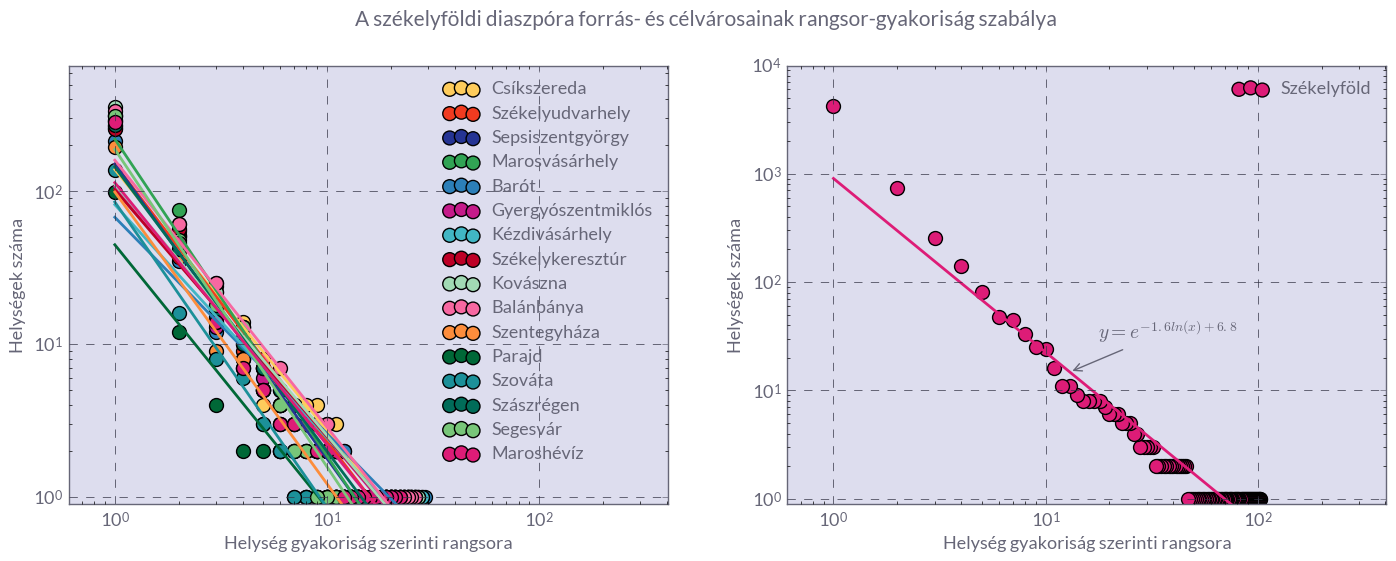

In [87]:
colors = {
'toplita': '#dd1c77',
'gyergyo': '#c51b8a',
'balan': '#f768a1',
'csikszereda': '#fecc5c',
'vlahica': '#fd8d3c',
'udvarhely': '#f03b20',
'keresztur': '#bd0026',
'szentgyorgy': '#253494',
'barot': '#2c7fb8',
'kezdi': '#41b6c4',
'kovaszna': '#a1dab4',
'segesvar': '#78c679',
'vasarhely': '#31a354',
'parajd': '#006837',
'szovata': '#1c9099',
'regen': '#016c59',
'kolozsvar': '#993404'
}
cities = {
'csikszereda': u'Csíkszereda',
'udvarhely': u'Székelyudvarhely',
'szentgyorgy': u'Sepsiszentgyörgy',
'vasarhely': u'Marosvásárhely',
'barot': u'Barót',
'gyergyo': u'Gyergyószentmiklós',
'kezdi': u'Kézdivásárhely',
'keresztur': u'Székelykeresztúr',
'kovaszna': u'Kovászna',
'balan': u'Balánbánya',
'vlahica': u'Szentegyháza',
'parajd': u'Parajd',
'szovata': u'Szováta',
'regen': u'Szászrégen',
'kolozsvar': u'Kolozsvár',
'segesvar': u'Segesvár',
'toplita': u'Maroshévíz'
}
ghisto={}
fig,ax=plt.subplots(1,2,subplot_kw=dict(axisbg='#ddddee'),figsize=(17,5.65))
for varos in varosok:
    histo={}
    if varos not in {"kolozsvar"}:
        for i in GX[varos]:
            if GX[varos][i] not in histo: histo[GX[varos][i]]=0
            histo[GX[varos][i]]+=1
            if GX[varos][i] not in ghisto: ghisto[GX[varos][i]]=0
            ghisto[GX[varos][i]]+=1
        x=np.array(range(len(histo.keys())))[::-1]+1
        y=np.sort(histo.values())
        w = np.polyfit(np.log(x),np.log(y),1) # obtaining regression parameters
        intersector=np.exp(w[0]*np.array(np.log(x))+w[1])
        ax[0].scatter(x,y,100,c=colors[varos], label=cities[varos])
        ax[0].plot(x,intersector,linewidth=2,color=colors[varos])
ax[0].set_xlabel(u"Helység gyakoriság szerinti rangsora",fontproperties=prop,color="#666677")
ax[0].set_ylabel(u"Helységek száma",fontproperties=prop,color="#666677")
ax[0].grid(color='#333344', linestyle='--')
leg=ax[0].legend(loc=1,framealpha=0)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].spines['bottom'].set_color("#666677")
ax[0].spines['top'].set_color("#666677")
ax[0].spines['left'].set_color("#666677")
ax[0].spines['right'].set_color("#666677")
ax[0].tick_params(axis='x', colors="#666677")
ax[0].tick_params(axis='y', colors="#666677")
for label in ax[0].get_xticklabels():
    label.set_fontproperties(prop)
for label in ax[0].get_yticklabels():
    label.set_fontproperties(prop)
texts = leg.get_texts()
for t in texts:
    t.set_color("#666677")
    t.set_fontproperties(prop)
ax[0].set_xlim(np.exp(-0.5),np.exp(6))
ax[0].set_ylim(np.exp(-0.1),np.exp(6.5))

x=np.array(range(len(ghisto.keys())))[::-1]+1
y=np.sort(ghisto.values())
w = np.polyfit(np.log(x),np.log(y),1) # obtaining regression parameters
intersector=np.exp(w[0]*np.array(np.log(x))+w[1])
ax[1].scatter(x,y,100,c=colors[varos], label=u"Székelyföld")
ax[1].plot(x,intersector,linewidth=2,color=colors[varos])
ax[1].set_xlabel(u"Helység gyakoriság szerinti rangsora",fontproperties=prop,color="#666677")
ax[1].set_ylabel(u"Helységek száma",fontproperties=prop,color="#666677")
ax[1].grid(color='#333344', linestyle='--')
ax[1].annotate('$y=e^{'+str(int(w[0]*100)/100.0)+'ln(x)+'+str(int(w[1]*100)/100.0)+'}$', 
               xy=(x[90], intersector[90]), xytext=(20,20),fontsize=14, 
            textcoords='offset points', ha='left', va='bottom',color="#666677",
            bbox=dict(boxstyle='round,pad=0.2', fc='none',ec='none'),
            arrowprops=dict(arrowstyle='->',color="#666677"))
leg=ax[1].legend(loc=1,framealpha=0)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
texts = leg.get_texts()
ax[1].spines['bottom'].set_color("#666677")
ax[1].spines['top'].set_color("#666677")
ax[1].spines['left'].set_color("#666677")
ax[1].spines['right'].set_color("#666677")
ax[1].tick_params(axis='x', colors="#666677")
ax[1].tick_params(axis='y', colors="#666677")
for label in ax[1].get_xticklabels():
    label.set_fontproperties(prop)
for label in ax[1].get_yticklabels():
    label.set_fontproperties(prop)
for t in texts:
    t.set_color("#666677")
    t.set_fontproperties(prop)
ax[1].set_xlim(np.exp(-0.5),np.exp(6))
ax[1].set_ylim(np.exp(-0.1),np.exp(9.2))
plt.suptitle(u"A székelyföldi diaszpóra forrás- és célvárosainak rangsor-gyakoriság szabálya",\
          y=1,fontproperties=prop,color="#666677",size=15)
plt.savefig('szekelyfold-rangsor-meret-szabaly1b.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#eeeeff", edgecolor='#666677')
plt.show()

csikszereda [-1.706858    6.59628154]
udvarhely [-1.88000174  6.7942175 ]
szentgyorgy [-1.95012407  6.94916854]
vasarhely [-2.12437967  6.99859906]
barot [-1.4287845   6.42396269]
gyergyo [-1.69437622  6.87923482]
kezdi [-1.51940231  6.56567208]
keresztur [-1.58813629  6.5082348 ]
kovaszna [-1.73713498  7.19643826]
balan [-1.47389504  6.22095976]
vlahica [-2.0610545   6.58035243]
parajd [-2.15829321  5.84531617]
szovata [-2.39303235  6.48402858]
regen [-1.96224147  6.79035745]
segesvar [-2.15710363  6.95881578]
toplita [-1.77123469  6.64772482]
[-1.43580673  9.44804666]


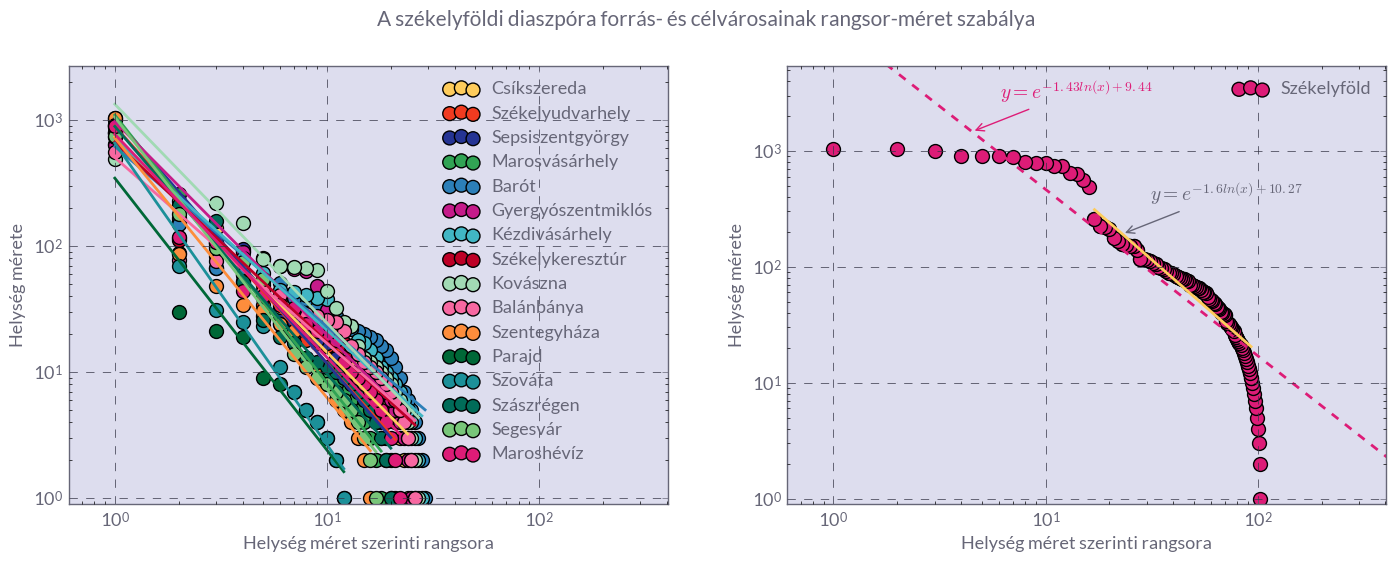

In [97]:
ghisto={}
fig,ax=plt.subplots(1,2,subplot_kw=dict(axisbg='#ddddee'),figsize=(17,5.65))
for varos in varosok:
    histo={}
    if varos not in {"kolozsvar"}:
        for i in GX[varos]:
            if GX[varos][i] not in histo: histo[GX[varos][i]]=0
            histo[GX[varos][i]]+=1
            if GX[varos][i] not in ghisto: ghisto[GX[varos][i]]=0
            ghisto[GX[varos][i]]+=1
        x=np.array(range(len(histo.values())))[::-1]+1
        y=np.sort(histo.keys())
        w = np.polyfit(np.log(x),np.log(y),1) # obtaining regression parameters
        intersector=np.exp(w[0]*np.array(np.log(x))+w[1])
        print varos,w
        ax[0].scatter(x,y,100,c=colors[varos], label=cities[varos])
        ax[0].plot(x,intersector,linewidth=2,color=colors[varos])
ax[0].set_xlabel(u"Helység méret szerinti rangsora",fontproperties=prop,color="#666677")
ax[0].set_ylabel(u"Helység mérete",fontproperties=prop,color="#666677")
ax[0].grid(color='#333344', linestyle='--')
leg=ax[0].legend(loc=1,framealpha=0)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].spines['bottom'].set_color("#666677")
ax[0].spines['top'].set_color("#666677")
ax[0].spines['left'].set_color("#666677")
ax[0].spines['right'].set_color("#666677")
ax[0].tick_params(axis='x', colors="#666677")
ax[0].tick_params(axis='y', colors="#666677")
for label in ax[0].get_xticklabels():
    label.set_fontproperties(prop)
for label in ax[0].get_yticklabels():
    label.set_fontproperties(prop)
texts = leg.get_texts()
for t in texts:
    t.set_color("#666677")
    t.set_fontproperties(prop)
ax[0].set_xlim(np.exp(-0.5),np.exp(6))
ax[0].set_ylim(np.exp(-0.1),np.exp(7.9))

x=np.array(range(len(ghisto.values())))[::-1]+1
y=np.sort(ghisto.keys())
z=[1,4.5,1000]
w = np.polyfit(np.log(x),np.log(y),1) # obtaining regression parameters
intersector=np.exp(w[0]*np.array(np.log(z))+w[1])
print w
ax[1].scatter(x,y,100,c=colors[varos], label=u"Székelyföld")
ax[1].plot(z,intersector,linewidth=2,linestyle="--",color=colors['toplita'])
ax[1].annotate('$y=e^{'+str(int(w[0]*100)/100.0)+'ln(x)+'+str(int(w[1]*100)/100.0)+'}$', 
               xy=(z[1], intersector[1]), xytext=(20,20),fontsize=14, 
            textcoords='offset points', ha='left', va='bottom',color=colors['toplita'],
            bbox=dict(boxstyle='round,pad=0.2', fc='none',ec='none'),
            arrowprops=dict(arrowstyle='->',color=colors['toplita']))

x=(np.array(range(len(ghisto.values())))[::-1]+1)[10:87]
y=np.sort(ghisto.keys())[10:87]
w = np.polyfit(np.log(x),np.log(y),1) # obtaining regression parameters
intersector=np.exp(w[0]*np.array(np.log(x))+w[1])
ax[1].scatter(x,y,100,c=colors[varos],)
ax[1].plot(x,intersector,linewidth=2,color=colors['csikszereda'])
ax[1].annotate('$y=e^{'+str(int(w[0]*100)/100.0)+'ln(x)+'+str(int(w[1]*100)/100.0)+'}$', 
               xy=(x[70], intersector[70]), xytext=(20,20),fontsize=14, 
            textcoords='offset points', ha='left', va='bottom',color="#666677",
            bbox=dict(boxstyle='round,pad=0.2', fc='none',ec='none'),
            arrowprops=dict(arrowstyle='->',color="#666677"))

ax[1].set_xlabel(u"Helység méret szerinti rangsora",fontproperties=prop,color="#666677")
ax[1].set_ylabel(u"Helység mérete",fontproperties=prop,color="#666677")
ax[1].grid(color='#333344', linestyle='--')
leg=ax[1].legend(loc=1,framealpha=0)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
texts = leg.get_texts()
ax[1].spines['bottom'].set_color("#666677")
ax[1].spines['top'].set_color("#666677")
ax[1].spines['left'].set_color("#666677")
ax[1].spines['right'].set_color("#666677")
ax[1].tick_params(axis='x', colors="#666677")
ax[1].tick_params(axis='y', colors="#666677")
for label in ax[1].get_xticklabels():
    label.set_fontproperties(prop)
for label in ax[1].get_yticklabels():
    label.set_fontproperties(prop)
for t in texts:
    t.set_color("#666677")
    t.set_fontproperties(prop)
ax[1].set_xlim(np.exp(-0.5),np.exp(6))
ax[1].set_ylim(np.exp(-0.1),np.exp(8.6))
plt.suptitle(u"A székelyföldi diaszpóra forrás- és célvárosainak rangsor-méret szabálya",\
          y=1,fontproperties=prop,color="#666677",size=15)
plt.savefig('szekelyfold-rangsor-meret-szabaly2b.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#eeeeff", edgecolor='#666677')
plt.show()

csikszereda [-1.8544962   5.14979157]
udvarhely [-1.35266528  4.52832356]
szentgyorgy [-2.30355962  5.67840296]
vasarhely [-2.29759761  5.69035245]
barot [-1.55944241  4.55681933]
gyergyo [-2.21259391  5.41428002]
kezdi [-2.30464992  5.51772392]
keresztur [-1.95745157  5.20303226]
kovaszna [-2.1297159   5.53386389]
balan [-1.93786658  5.4142668 ]
vlahica [-2.52590504  5.2693608 ]
parajd [-2.31467831  4.4265197 ]
szovata [-2.27777559  4.71634156]
regen [-1.7600645   5.03613166]
segesvar [-2.08811253  5.46361411]
toplita [-2.21808557  5.31122182]
[-1.75877295  7.27850051]


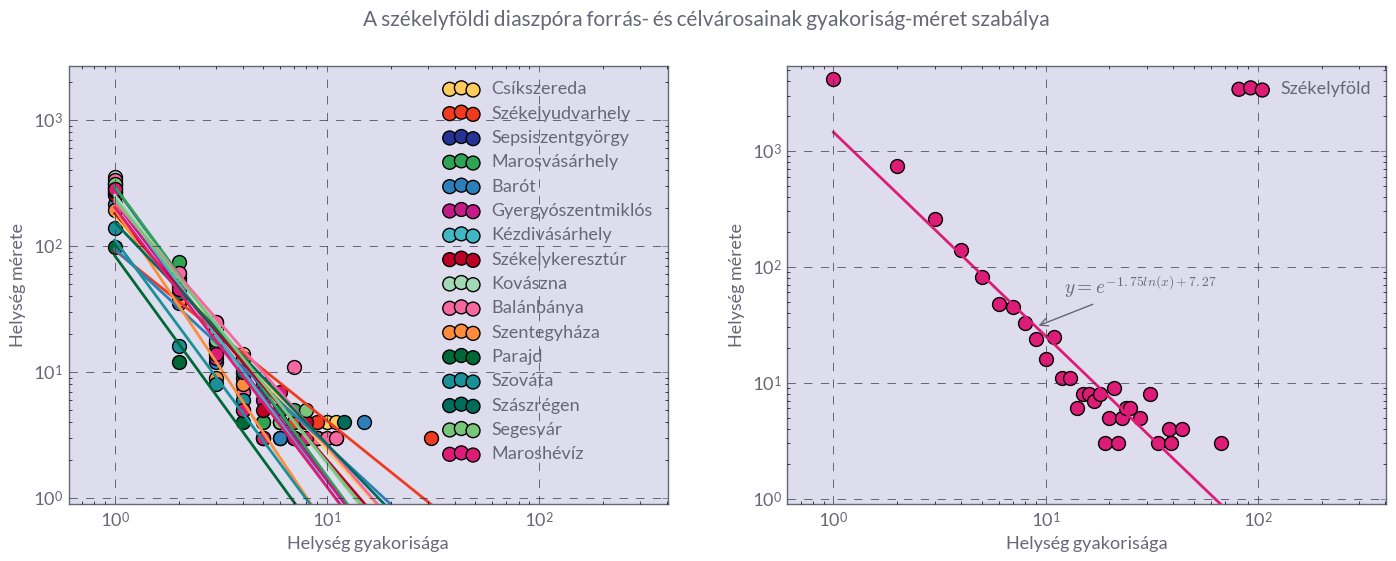

In [102]:
ghisto={}
fig,ax=plt.subplots(1,2,subplot_kw=dict(axisbg='#ddddee'),figsize=(17,5.65))
for varos in varosok:
    histo={}
    if varos not in {"kolozsvar"}:
        for i in GX[varos]:
            if GX[varos][i] not in histo: histo[GX[varos][i]]=0
            histo[GX[varos][i]]+=1
            if GX[varos][i] not in ghisto: ghisto[GX[varos][i]]=0
            ghisto[GX[varos][i]]+=1
        histo2=histo.copy()
        for i in histo2:
            if histo[i]<3: histo.pop(i)
        y= histo.values()
        x= histo.keys()
        z=[1,1000]
        w = np.polyfit(np.log(x),np.log(y),1) # obtaining regression parameters
        intersector=np.exp(w[0]*np.array(np.log(z))+w[1])
        print varos,w
        ax[0].scatter(x,y,100,c=colors[varos], label=cities[varos])
        ax[0].plot(z,intersector,linewidth=2,color=colors[varos])
ax[0].set_xlabel(u"Helység gyakorisága",fontproperties=prop,color="#666677")
ax[0].set_ylabel(u"Helység mérete",fontproperties=prop,color="#666677")
ax[0].grid(color='#333344', linestyle='--')
leg=ax[0].legend(loc=1,framealpha=0)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].spines['bottom'].set_color("#666677")
ax[0].spines['top'].set_color("#666677")
ax[0].spines['left'].set_color("#666677")
ax[0].spines['right'].set_color("#666677")
ax[0].tick_params(axis='x', colors="#666677")
ax[0].tick_params(axis='y', colors="#666677")
for label in ax[0].get_xticklabels():
    label.set_fontproperties(prop)
for label in ax[0].get_yticklabels():
    label.set_fontproperties(prop)
texts = leg.get_texts()
for t in texts:
    t.set_color("#666677")
    t.set_fontproperties(prop)
ax[0].set_xlim(np.exp(-0.5),np.exp(6))
ax[0].set_ylim(np.exp(-0.1),np.exp(7.9))

ghisto2=ghisto.copy()
for i in ghisto2:
    if ghisto[i]<3: ghisto.pop(i)
y=ghisto.values()
x=ghisto.keys()
z=[1,9,1000]
w = np.polyfit(np.log(x),np.log(y),1) # obtaining regression parameters
intersector=np.exp(w[0]*np.array(np.log(z))+w[1])
print w
ax[1].scatter(x,y,100,c=colors[varos], label=u"Székelyföld")
ax[1].plot(z,intersector,linewidth=2,color=colors[varos])
ax[1].annotate('$y=e^{'+str(int(w[0]*100)/100.0)+'ln(x)+'+str(int(w[1]*100)/100.0)+'}$', 
               xy=(z[1], intersector[1]), xytext=(20,20),fontsize=14, 
            textcoords='offset points', ha='left', va='bottom',color="#666677",
            bbox=dict(boxstyle='round,pad=0.2', fc='none',ec='none'),
            arrowprops=dict(arrowstyle='->',color="#666677"))
ax[1].set_xlabel(u"Helység gyakorisága",fontproperties=prop,color="#666677")
ax[1].set_ylabel(u"Helység mérete",fontproperties=prop,color="#666677")
ax[1].grid(color='#333344', linestyle='--')
leg=ax[1].legend(loc=1,framealpha=0)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
texts = leg.get_texts()
ax[1].spines['bottom'].set_color("#666677")
ax[1].spines['top'].set_color("#666677")
ax[1].spines['left'].set_color("#666677")
ax[1].spines['right'].set_color("#666677")
ax[1].tick_params(axis='x', colors="#666677")
ax[1].tick_params(axis='y', colors="#666677")
for label in ax[1].get_xticklabels():
    label.set_fontproperties(prop)
for label in ax[1].get_yticklabels():
    label.set_fontproperties(prop)
for t in texts:
    t.set_color("#666677")
    t.set_fontproperties(prop)
ax[1].set_xlim(np.exp(-0.5),np.exp(6))
ax[1].set_ylim(np.exp(-0.1),np.exp(8.6))
plt.suptitle(u"A székelyföldi diaszpóra forrás- és célvárosainak gyakoriság-méret szabálya",\
          y=1,fontproperties=prop,color="#666677",size=15)
plt.savefig('szekelyfold-rangsor-meret-szabaly3b.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#eeeeff", edgecolor='#666677')
plt.show()

finish data processing of power law cityshare

In [2539]:
for i in GG["cities"]:
    GG["cities"][i]["count"]=0

G={"cities":{}}
for i in GG["cities"]:
    for j in GG["cities"][i]:
        if j not in {"country","county","orig","coords","count"}:
            if GG["cities"][i][j]["country"] not in G["cities"]:
                G["cities"][GG["cities"][i][j]["country"]]={}
            if "coords" not in G["cities"][GG["cities"][i][j]["country"]]:
                G["cities"][GG["cities"][i][j]["country"]]["coords"]=gountrygeo[GG["cities"][i][j]["country"]]
            if "count" not in G["cities"][GG["cities"][i][j]["country"]]:
                G["cities"][GG["cities"][i][j]["country"]]["count"]=0
    
            GG["cities"][i][j]["count"]=(cityshare[j][i]*lakos[j])
            GG["cities"][i]["count"]+=GG["cities"][i][j]["count"]
            
            G["cities"][GG["cities"][i][j]["country"]]["count"]+=GG["cities"][i][j]["count"]
            if j not in G["cities"][GG["cities"][i][j]["country"]]: 
                G["cities"][GG["cities"][i][j]["country"]][j]=\
                    {"count":GG["cities"][i][j]["count"],"coords":[0,0],"country":GG["cities"][i][j]["country"]}
            else: G["cities"][GG["cities"][i][j]["country"]][j]["count"]+=GG["cities"][i][j]["count"]
            
file('data1b.json','w').write(json.dumps(GG))  
file('data2b.json','w').write(json.dumps(G))

In [ ]:
for i in GG["cities"]:
    GG["cities"][i]["count"]=0

G={"cities":{}}
for i in GG["cities"]:
    for j in GG["cities"][i]:
        if j not in {"country","county","orig","coords","count"}:
            if GG["cities"][i][j]["country"] not in G["cities"]:
                G["cities"][GG["cities"][i][j]["country"]]={}
            if "coords" not in G["cities"][GG["cities"][i][j]["country"]]:
                G["cities"][GG["cities"][i][j]["country"]]["coords"]=gountrygeo[GG["cities"][i][j]["country"]]
            if "count" not in G["cities"][GG["cities"][i][j]["country"]]:
                G["cities"][GG["cities"][i][j]["country"]]["count"]=0
    
            country=GG["cities"][i][j]["country"]
            if country not in cr: country="Other"
            GG["cities"][i][j]["count"]=(cityshare[j][i]*R2[j][country])
            GG["cities"][i]["count"]+=GG["cities"][i][j]["count"]
            
            G["cities"][GG["cities"][i][j]["country"]]["count"]+=GG["cities"][i][j]["count"]
            if j not in G["cities"][GG["cities"][i][j]["country"]]: 
                G["cities"][GG["cities"][i][j]["country"]][j]=\
                    {"count":GG["cities"][i][j]["count"],"coords":[0,0],"country":GG["cities"][i][j]["country"]}
            else: G["cities"][GG["cities"][i][j]["country"]][j]["count"]+=GG["cities"][i][j]["count"]
            
file('data1b.json','w').write(json.dumps(GG))  
file('data2b.json','w').write(json.dumps(G))

In [2573]:
(sum(lakos.values())-lakos['kolozsvar'])/2

215059

In [2531]:
1-sum([R2[i]['Romania'] for i in R2])/(sum(lakos.values())-lakos['kolozsvar'])

0.22765318513511468

In [2586]:
60**3

216000

In [2533]:
sum([R2[i]['Germany'] for i in R2])

15466.487634729145

In [2523]:
[sum(R2[i].values()) for i in R2],sum([sum(R2[i].values()) for i in R2])

([28102.000000000007,
  13285.0,
  6501.999999999999,
  18377.0,
  8567.0,
  37980.0,
  5864.000000000002,
  54311.99999999999,
  9491.000000000002,
  10264.999999999998,
  33281.0,
  134290.0,
  6820.000000000001,
  10234.000000000004,
  18490.999999999996,
  34256.99999999999],
 430118.0)

In [2534]:
GX={}
Gsum={}
cityshare={}
for i in GG["cities"]:
    for j in GG["cities"][i]:
        if j not in {"country","county","orig","coords","count"}:
            if j not in GX:
                GX[j]={}
                cityshare[j]={}
            if i not in GX[j]:
                GX[j][i]=0
                cityshare[j][i]=2
            GX[j][i]+=GG["cities"][i][j]["count"]

Emigration values

In [2346]:
#global
R3={}
for i in R2:
    R3[i]=100-int(R2[i]["Romania"]*100/sum(R2[i].values()))
file('data3.json','w').write(json.dumps(R3))

In [2347]:
#local
megye={
'csikszereda': 'HR',
'udvarhely': 'HR',
'szentgyorgy': 'CV',
'vasarhely': 'MS',
'barot': 'CV',
'gyergyo': 'HR',
'kezdi': 'CV',
'keresztur': 'HR',
'kovaszna': 'CV',
'balan': 'HR',
'vlahica': 'HR',
'parajd': 'HR',
'szovata': 'MS',
'regen': 'MS',
'kolozsvar': 'CJ',
'segesvar': 'MS',
'toplita': 'HR'
}
E3={}
for i in E2:
    E3[i]=100-int(E2[i][megye[i]]*100/sum(E2[i].values()))
file('data4.json','w').write(json.dumps(E3))

In [1772]:
cd.append('Other')
ce.append('Other')

In [1773]:
cities = {
'csikszereda': 'Csíkszereda',
'udvarhely': 'Székelyudvarhely',
'szentgyorgy': 'Sepsiszentgyörgy',
'vasarhely': 'Marosvásárhely',
'barot': 'Barót',
'gyergyo': 'Gyergyószentmiklós',
'kezdi': 'Kézdivásárhely',
'keresztur': 'Székelykeresztúr',
'kovaszna': 'Kovászna',
'balan': 'Balánbánya',
'vlahica': 'Szentegyháza',
'parajd': 'Parajd',
'szovata': 'Szováta',
'regen': 'Szászrégen',
'kolozsvar': 'Kolozsvár',
'segesvar': 'Segesvár',
'toplita': 'Maroshévíz',
'Italy':'Olaszország',
'Spain':'Spanyolország',
'Germany':'Németország',
'Hungary':'Magyarország',
'United Kingdom':'Egyesült Királyság',
'Other':'Más',
'France':'Franciaország',
'United States':'Egyesült Államok',
'Austria':'Ausztria',
'Canada':'Kanada',
'Denmark':'Dánia',
'Sweden':'Svédország',
'Switzerland':'Svájc',
'Bucharest':'Bukarest',
'HR':'Hargita',
'BH':'Bihar',
'BV':'Brassó',
'TM':'Temes',
'CJ':'Kolozs',
'MS':'Maros',
'CV':'Kovászna',
'SB':'Szeben',
'SJ':'Szilágy',
'BC':'Bákó',
'Other':'Más'
}

In [1774]:
colors = {
'toplita': '#dd1c77',
'gyergyo': '#c51b8a',
'balan': '#f768a1',
'csikszereda': '#fecc5c',
'vlahica': '#fd8d3c',
'udvarhely': '#f03b20',
'keresztur': '#bd0026',
'szentgyorgy': '#253494',
'barot': '#2c7fb8',
'kezdi': '#41b6c4',
'kovaszna': '#a1dab4',
'segesvar': '#78c679',
'vasarhely': '#31a354',
'parajd': '#006837',
'szovata': '#1c9099',
'regen': '#016c59',
'kolozsvar': '#993404'}

In [1775]:
F={"links":[],"nodes":[]}
fd={}
for i in range(len(list(set(cd+D2.keys())))):
    if list(set(cd+D2.keys()))[i] in colors:
        color=colors[list(set(cd+D2.keys()))[i]]
    else: color="#667"
    F["nodes"].append({"name":cities[list(set(cd+D2.keys()))[i]],"fill":color})
    fd[list(set(cd+D2.keys()))[i]]=i
for i in D2:
    for j in D2[i]:
        F["links"].append({"source":fd[i],"target":fd[j],"value":D2[i][j]})
file('sk1.json','w').write(json.dumps(F))

F={"links":[],"nodes":[]}
fd={}
for i in range(len(list(set(ce+E2.keys())))):
    if list(set(ce+E2.keys()))[i] in colors:
        color=colors[list(set(ce+E2.keys()))[i]]
    else: color="#667"
    F["nodes"].append({"name":cities[list(set(ce+E2.keys()))[i]],"fill":color})
    fd[list(set(ce+E2.keys()))[i]]=i
for i in E2:
    for j in E2[i]:
        F["links"].append({"source":fd[i],"target":fd[j],"value":E2[i][j]})
file('sk2.json','w').write(json.dumps(F))

Circle packing

For second part, unused now

In [335]:
studlist=[]
unilist=[]
for i in P:
    if 'stud' in i:
        if ' at ' in i['stud']:
            a1=i['stud'].find(' at ')
            unilist.append(i['stud'][a1+4:])
            if i['stud'][:a1]!='':
                studlist.append(i['stud'][1:a1])

In [14]:
worklist=[]
for i in P:
    if 'work' in i:
        if ' at ' in i['work']:
            a1=i['work'].find(' at ')
            if i['work'][:a1]!='':
                worklist.append(i['work'][:a1])

Kovetkezo blogbejgyzesben vizsgaljuk a foglalkozasokat, elsoben csak azt hogy ki hol merre van


In [39]:
def workdict(s):
    if "Fodrász" in s\
        or "manikur" in s \
        or "Manikur" in s \
        or "Manicur" in s \
        or "manicur" in s \
        or "Műkörmös" in s \
        or "airdresser" in s \
        or "hair-cutter" in s \
        or "ozmetikus" in s \
        or "Fodrasz" in s \
        or "Stylist" in s \
        or "manichiur" in s \
        or "edikűr" in s \
        or "Nail Technician" in s \
        or "köröm" in s: return u"Fodrász/Kozmetikus"
    elif "Engineer" in s \
        or "mérnök" in s \
        or "építész" in s \
        or "rchitect" in s \
        or "Inginer" in s \
        or "arhitect" in s \
        or "inginer" in s \
        or "AutoCAD" in s \
        or "ing silvic" in s \
        or "Sc.Electrica" in s \
        or "Land Surveyor" in s \
        or "Cartographer" in s : return u"Mérnök/Műépítész"
    elif "ügyvéd" in s\
        or "avocat" in s \
        or "Avocat" in s \
        or "Lawyer" in s : return u"Ügyvéd"
    elif "Montessori Educator" in s \
        or "szociológus" in s \
        or "Graduate Student Researcher" in s \
        or "Teaching Assistant" in s \
        or "Tanar" in s \
        or "Tanár" in s \
        or "Tanàr" in s \
        or "studying" in s \
        or "anuló" in s \
        or "Diák" in s \
        or "edagóg" in s \
        or "Lab Assistant" in s \
        or "Rector" in s \
        or "doktorandusz" in s \
        or "Teacher" in s \
        or "tanító" in s \
        or "tanitó" in s \
        or "tanár" in s \
        or "Profesor" in s \
        or "Student" in s \
        or "tudent" in s \
        or "szakértő" in s \
        or "Archaeol" in s \
        or "tanácsos" in s \
        or "rofessor" in s \
        or "Rektor" in s \
        or "PhD" in s \
        or "adjunktus" in s \
        or "niversity" in s \
        or "laboráns" in s \
        or "Science" in s \
        or "TANÍTÓ" in s \
        or "Psycholog" in s \
        or "pszicho" in s \
        or "Psziho" in s \
        or "psziho" in s \
        or "Pszicho" in s \
        or "Biologist" in s \
        or "oktatási vezető" in s \
        or "szakfelügyelő" in s \
        or "történelem tanár" in s: return u"Tanár/Kutató"
    elif "eveloper" in s \
        or "evelopment" in s \
        or "webdesign" in s \
        or "IT Service" in s \
        or "Global masterdata" in s \
        or "software engineer" in s \
        or "ASM" in s: return u"Informatikus"
    elif "Veterinarian" in s \
        or "Dentist" in s \
        or "orvos" in s \
        or "Orvos" in s \
        or "Doctor" in s \
        or "medic" in s \
        or "rtoped" in s \
        or "Orthodontist" in s \
        or "Fogtechnikus" in s \
        or "Pharma" in s \
        or "Dietitian" in s \
        or "rezidens" in s \
        or "Rezident" in s \
        or "Resident" in s \
        or "farmacist" in s \
        or "Farmacist" in s \
        or "Dr." in s \
        or "Health" in s \
        or "Optometrista" in s \
        or "Medic" in s: return u"Orvos/Gyógyszerész"
    elif "Trainer" in s \
        or "Gyógypedagógus" in s \
        or "Gyógytornász" in s \
        or "kinetoterapeuta" in s \
        or "Coach" in s \
        or "Instructor" in s \
        or "itness" in s \
        or "edző" in s \
        or "Edzo" in s \
        or "sport" in s \
        or "MTB Rider" in s \
        or "Játékos" in s \
        or "thlete" in s \
        or "kapus" in s \
        or "oalkeeper" in s \
        or "hátvéd" in s \
        or "Védő" in s \
        or "STRIKER" in s \
        or "Forward" in s \
        or "Versenyzo" in s \
        or "Versenyfelügyelő" in s \
        or "Defense" in s \
        or "rbitru" in s \
        or "Point Guard" in s \
        or "Beálló" in s \
        or "estnevel" in s \
        or "beálló" in s \
        or "Masseur" in s \
        or "özéppályás" in s \
        or "Player" in s: return u"Sportoló/Edző/Bíró"
    elif "Analyst" in s \
        or "Online Communication" in s \
        or "Communication Assistant" in s \
        or "Marketing Assistant" in s \
        or "Relations Assistant" in s \
        or "Marketing Officer" in s \
        or "Marketing Specialist" in s \
        or "Online Marketing" in s \
        or "PR & Marketing" in s \
        or "Public Relations" in s \
        or "PR Officer" in s \
        or "Asistent PR" in s \
        or "Designer" in s \
        or "dministrator" in s \
        or "dminisztrátor" in s \
        or "dminisztr" in s \
        or "Adm." in s \
        or "Chief Accountant" in s \
        or "Oficer credite" in s \
        or "Forwarder" in s \
        or "SEF SERVICIU" in s \
        or "Managing Partner - MENA" in s \
        or "CSR" in s \
        or "oordinator" in s \
        or "oordonator" in s \
        or "könyvelő" in s \
        or "Project Officer" in s \
        or "Comptroller" in s \
        or "titkár" in s \
        or "Titkár" in s \
        or "Internet Marketer" in s \
        or "secretar" in s \
        or "Supplier Relations Advisor" in s \
        or "Secretar" in s \
        or "SECRETAR" in s \
        or "contabil" in s \
        or "Contabil" in s \
        or "ccountant" in s \
        or "Planner" in s \
        or "Controlling" in s \
        or "Accounts Payable" in s \
        or "Irodavezető" in s \
        or "QMC" in s \
        or "Osztályvezető" in s \
        or "Quality Control" in s \
        or "Account Representative" in s \
        or "Order Managment" in s \
        or "Tanácsadó" in s \
        or "főmunkatárs" in s \
        or "Economist" in s \
        or "Auditor" in s \
        or "Inspector" in s \
        or "Intézményvezető helyettes" in s \
        or "Plenum member, competition concillor" in s \
        or "Key Account Operator" in s: return u"Irodai alkalmazott"
    elif "Agent" in s \
        or "Komissiós" in s \
        or "Commissioner" in s \
        or "Tanácsadó" in s \
        or "Consultant" in s \
        or "Sales" in s \
        or "Kassza" in s \
        or "Receptionist" in s \
        or "Recepcionist" in s \
        or "hôtel" in s \
        or "eladó" in s \
        or "elado" in s \
        or "Sales Reprezentative" in s \
        or "Consultant Vanzari" in s \
        or "Reprezentant vânzări" in s \
        or "Bezirks" in s \
        or "ügynök" in s \
        or "Front Officer" in s \
        or "özvetít" in s \
        or "Forgalamzo" in s \
        or "Broker" in s \
        or "üzletvezető" in s \
        or "elarusito" in s \
        or "ügyfélszolgálat" in s \
        or "Technical Support" in s \
        or "Care Assistant" in s \
        or "vanzato" in s \
        or "Eladó" in s \
        or "DC Support Executive" in s \
        or "Elárus" in s: return u"Eladó/Ügynök/Recepciós"
    elif "Cook (servant)" in s \
        or "Bartender" in s \
        or "cukrász" in s \
        or "kemencés" in s \
        or "Waitress" in s \
        or "Le chef" in s \
        or "chelner" in s \
        or "Pizza" in s \
        or "Báros" in s \
        or "büfés" in s \
        or "waiter" in s \
        or "Waiter" in s \
        or "Barman" in s \
        or "Table host" in s \
        or "kiszolgáló" in s \
        or "Pincer" in s \
        or "elszolgál" in s \
        or "ospatar" in s \
        or "Cafengiu" in s \
        or "Chef" in s \
        or "PÉK" in s \
        or "zakács" in s \
        or "zeletelő" in s \
        or "emencés" in s \
        or "Barista" in s \
        or "Food and Beverage" in s \
        or "Pincér" in s: return u"Bartender/Pincér/Szakács"
    elif "Reporter" in s \
        or "Stage management" in s \
        or "rendezvényszervező asszisztens" in s \
        or "Photo" in s \
        or "Fotó" in s \
        or "Fénykép" in s \
        or "Fotolaborator" in s \
        or "Press" in s \
        or "music director" in s \
        or "2D Animator" in s \
        or "Sound & Light" in s \
        or "Editor" in s \
        or "Model" in s \
        or "referen" in s \
        or "Referen" in s \
        or "szerkeszt" in s \
        or "Producer" in s \
        or "ournalist" in s \
        or "Kreatív" in s \
        or "Correspondent" in s \
        or "reklám" in s \
        or "rafikus" in s \
        or "műsor" in s \
        or "Hang és fény" in s \
        or "Nyomdász" in s \
        or "tipograf" in s \
        or "usorvezeto" in s \
        or "vágó" in s \
        or "újság" in s \
        or "Graphic Design" in s \
        or "Történelem tematikájú műsor" in s \
        or "Presenter" in s: return u"Médiamunkás"
    elif "Author" in s \
        or "DJ" in s \
        or "Actor" in s \
        or "Drummer" in s \
        or "Singer" in s \
        or "Bőgős" in s \
        or "táncos" in s \
        or "Táncos" in s \
        or "Dansator" in s \
        or "Prímás" in s \
        or "artist" in s \
        or "Artist" in s \
        or "zenész" in s \
        or "zínész" in s \
        or "Bass" in s \
        or "Solista" in s \
        or "Piercer" in s \
        or "tárlatvezető" in s \
        or "énekes" in s \
        or "Énekes" in s \
        or "Guitar" in s \
        or "GitáR" in s \
        or "művész" in s \
        or "axophon" in s \
        or "Dancer" in s: return u"Zenész/Művész"
    elif "Owner" in s \
        or "Tulajdonos" in s \
        or "Director" in s \
        or "Manager" in s \
        or "Management" in s \
        or "lnök" in s \
        or "főnők" in s \
        or "gazgat" in s \
        or "Leader" in s \
        or "Űgyvezető" in s \
        or "gyvezető" in s \
        or "tulajdonos" in s \
        or "Kirendeltségvezető" in s \
        or "Managing Partner" in s \
        or "Chief" in s \
        or "Boss" in s \
        or "elönk" in s \
        or "cégvezető" in s \
        or "President" in s \
        or "fővezető" in s \
        or "reşedint" in s \
        or "Főnök" in s \
        or "fönök" in s \
        or "Fönök" in s \
        or "Proprietar" in s \
        or "C.E.O." in s \
        or "Founder" in s: return u"Igazgató/Vállalkozó"
    elif "Nevelo" in s \
        or "Au Pair" in s \
        or "óvónő" in s \
        or "nevelo" in s \
        or "asszisztens" in s \
        or "aszisztens" in s \
        or "szociális munkás" in s \
        or "szociálpedagógus" in s \
        or "Volunteering" in s \
        or "nkéntes" in s \
        or "ápolo" in s \
        or "ápoló" in s \
        or "betegapolo" in s \
        or "Betegek" in s \
        or "ASISTENT MEDICAL" in s \
        or "Educato" in s \
        or "dadus" in s \
        or "szobalány" in s \
        or "Krankenschw" in s \
        or "Nurs" in s: return u"Nevelő/Au Pair/Önkéntes"
    elif "Lactatos" in s \
        or "szerelő" in s \
        or "soportvezető" in s \
        or "dekorator" in s \
        or "Decorator" in s \
        or "egesztő" in s \
        or "munkas" in s \
        or "Operator statie" in s \
        or "Mailmaster" in s \
        or "mashine oper" in s \
        or "Hentes" in s \
        or "Construction" in s \
        or "INSPECTOR ITP" in s \
        or "Auto Mechanic" in s \
        or "Electrician" in s \
        or "Ipari Alpinista" in s \
        or "épkezel" in s \
        or "kazan fütö" in s \
        or "kazan futu" in s \
        or "Gépbeáll" in s \
        or "segédmunkás" in s \
        or "segéd munkás" in s \
        or "asztalos" in s \
        or "kovács" in s \
        or "varr" in s \
        or "varono" in s \
        or "Múnkás" in s \
        or "Husipar" in s \
        or "csomagolas" in s \
        or "Kabelteve tehnikus" in s \
        or "omuves" in s \
        or "könyvtáros" in s \
        or "azánkezel" in s \
        or "őműves" in s \
        or "Könyvkötő" in s \
        or "Shaper" in s: return u"Szakmunkás"
    elif "Iranyito" in s \
        or "aktáros" in s \
        or "iszpécser" in s \
        or "Logistics Specialist" in s \
        or "Logisztikai részlegvezető" in s \
        or "COORDONATOR DE TRANSPORT" in s \
        or "ogistik" in s \
        or "Loctitian" in s \
        or "Raktár" in s \
        or "ogistic" in s \
        or "ogisztik" in s \
        or "Receiving Operator" in s: return u"Raktáros/Logisztikus"
    elif "Driver" in s \
        or "Vezető" in s \
        or "Distributor" in s \
        or "Sofôr" in s \
        or "zallitó" in s \
        or "SOFÖR" in s \
        or "zallito" in s \
        or "zállito" in s \
        or "zállitó" in s \
        or "kamion" in s \
        or "posta" in s \
        or "kiszálitó" in s \
        or "uszvezet" in s \
        or "gépkocsi" in s \
        or "Gépkocsi" in s \
        or "SOFOR" in s \
        or "argonc" in s \
        or "driver" in s \
        or "instructor auto" in s \
        or "Curier." in s: return u"Sofőr"
    elif "polgármester" in s \
        or "alkalmazott" in s \
        or "örmester" in s \
        or "Tanácsos" in s \
        or "Police" in s \
        or "Politic" in s \
        or "tisztvisel" in s \
        or "Ambassador" in s \
        or "önkormány" in s \
        or "politikus" in s: return u"Közalkalmazott"
    elif "Someone who stares" in s \
        or "Mindenes" in s \
        or "yakornok" in s \
        or "trainee" in s \
        or "..." in s \
        or "intern" in s \
        or "draien" in s \
        or "Crew" in s \
        or "Extrema" in s \
        or "Lifeguard" in s \
        or "DTH" in s \
        or "Pilot" in s \
        or "Hmm" in s \
        or "Member" in s \
        or "Asociat" in s \
        or "női kvóta" in s \
        or "Méhész" in s \
        or "Steinbruch" in s \
        or "Szentgyorgy" in s \
        or "koptatom" in s \
        or "Supervisor" in s \
        or "Hegyimentő" in s \
        or "Intern" in s \
        or "Beosztom magam :-)" in s \
        or "Putzfrau" in s \
        or "securitate" in s \
        or "kulfold" in s \
        or "mploye" in s \
        or "lelkész" in s \
        or "ez meg az" in s \
        or "Perfect" in s \
        or "Admin" in s \
        or "Élni tanitok" in s \
        or "trichinella" in s \
        or "állat kezel" in s \
        or "Gondnok." in s \
        or "pásztor" in s \
        or "biztonsagi" in s \
        or "bisztonsagi" in s \
        or "Hitman" in s \
        or "Missionary" in s \
        or "Full Time Mum" in s \
        or "Mommy" in s \
        or "CCZR" in s \
        or "my own boss" in s \
        or "Szolárium" in s \
        or "rofessor" in s \
        or "Freelancer" in s \
        or "itchhiker" in s \
        or "Associate" in s \
        or "øadinğ ..… ▂ ▃ ▄ ▅ ▆ ▇ █ ✖ I♥ G@ss£riNe ✖ I♥ ѕuммεʀ • ✖I♥ Pɑʀту >> ✖I♥ ɢɪʀℓѕ ✖I♥ Aℓℓ му Fʀɪeиďs ✖X' Sortir ✖X' Dormir ✖X' Rire ✖X' Manger → 'lOvE' ← →♫ ℳʋʂɨգʊҿ ♫" in s \
        or "Staff" in s \
        or "C, OG, DS" in s \
        or "og/dt" in s \
        or "Pirate" in s \
        or "Self-employed" in s \
        or "Housekeeping" in s \
        or "RH" in s \
        or "Captain" in s \
        or "GÖRGÉNY" in s \
        or "destin" in s \
        or "képzelgés" in s \
        or "Koptatom" in s \
        or "Nyalóka Móka" in s \
        or "SZÁSZNIKA" in s \
        or "100%" in s \
        or "sokminden" in s \
        or "juniyear" in s \
        or "hetfo" in s \
        or "Hetfo" in s \
        or "Frec mangal" in s \
        or "er" in s : return u"Más"
        
    else: return s

In [40]:
workset={}
for i in worklist:
    if workdict(i) not in workset:
        workset[workdict(i)]=1
        print workdict(i)
    else: workset[workdict(i)]+=1

Irodai alkalmazott
Tanár/Kutató
Mérnök/Műépítész
Szakmunkás
Orvos/Gyógyszerész
Médiamunkás
Más
Igazgató/Vállalkozó
Zenész/Művész
Bartender/Pincér/Szakács
Közalkalmazott
Sofőr
Eladó/Ügynök/Recepciós
Sportoló/Edző/Bíró
Nevelő/Au Pair/Önkéntes
Informatikus
Fodrász/Kozmetikus


In [639]:
workset

{u'Bartender/Pinc\xe9r/Szak\xe1cs': 12,
 u'Elad\xf3/\xdcgyn\xf6k/Recepci\xf3s': 24,
 u'Fodr\xe1sz/Kozmetikus': 6,
 u'Igazgat\xf3/V\xe1llalkoz\xf3': 69,
 u'Informatikus': 36,
 u'Irodai alkalmazott': 55,
 u'K\xf6zalkalmazott': 4,
 u'M\xe1s': 67,
 u'M\xe9diamunk\xe1s': 35,
 u'M\xe9rn\xf6k/M\u0171\xe9p\xedt\xe9sz': 36,
 u'Nevel\u0151/Au Pair/\xd6nk\xe9ntes': 7,
 u'Orvos/Gy\xf3gyszer\xe9sz': 70,
 u'Rakt\xe1ros/Logisztikus': 3,
 u'Sof\u0151r': 3,
 u'Sportol\xf3/Edz\u0151/B\xedr\xf3': 11,
 u'Szakmunk\xe1s': 6,
 u'Tan\xe1r/Kutat\xf3': 25,
 u'Zen\xe9sz/M\u0171v\xe9sz': 15,
 u'\xdcgyv\xe9d': 1}

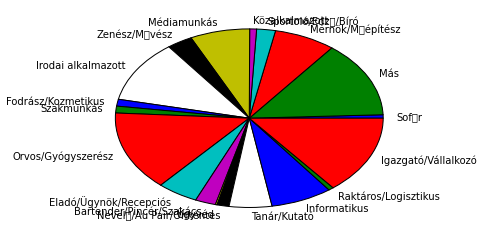

In [641]:
plt.pie(workset.values(),labels=[(i) for i in workset.keys()])
plt.show()

In [ ]:
parajd, balan, vlahica exhaustive, barot majdnem, 